In [1]:
%%HTML
<script src="require.js"></script>

In [2]:
from IPython.display import display, HTML, clear_output
HTML('''<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script><script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

In [287]:
#loading libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu

def pretty_print(df):
    """Pretty print the dataframe

    Parameters
    ----------
    df : df
        Data Frame

    Returns
    ----------
    Display Object
        Pretty printed Data Frame
    """
    return display(HTML(df.to_html().replace("\\n", "<br>")))

<img src='acs rice cover.png'/>

<center>by <b>Paulo Mario Medina, Gian Paolo Servañez,</b></center>
<center><b>Gregory Uy, and Ana Dominique Vasquez</b></center>
<center>Applied Computational Statistics | MSDS 2024 Learning Team 4 | Asian Institute of Management</center>
<center>Submitted 6 December 2023</center>

<h1 style="color: #E4E2D4; padding: 10px 10px 10px 10px; background-image:url(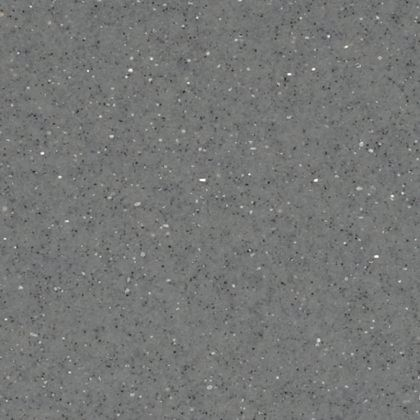)">Executive Summary</h1>

<h3 style='font-family: serif'><b><i>Background</i></b></h3>

<p>This paper aimed to explore the performance of Hybrid Rice and Inbred Rice based on the study conducted by Ellanie Cabrera, and hosted on the Harvard Dataverse. In this study, the rice harvest data that was taken in 2005 was explored, with complete data for the farm situation, house hold, rice breed, and farm factors. The relationship of the breed (i.e. whether it is hybrid or inbred) to its yield was examined with exploratory data analysis and statistical methods to get a clear idea of the effect of various conditions on the productivity of both breeds of rice.</p>

<h3 style='font-family: serif'><b><i>Data and Methodology</i></b></h3>

<p>The data contains 324 rows and 126 columns of data on rice yields in the provinces of Bukidnon and Isabela. Each row is a separate plot of land which grew a different variety of rice while the columns include all relevant data on the land, irrigation, variety, input costs, and yield for that plot. We processed this data to show summary values for yield, cost, and labor for each plot then performed EDA to show the impact of each feature on rice yield. Afterwards, Z-test, one-way ANOVA, and Mann-Whitney U Test is performed to test each hypothesis listed on the table. Below is a summary of the research questions and the corresponding hypothesis tests.</p>

<p><b>Table 1.</b></p>
<p><i>Research Question, Hypothesis Test, and Brief Rationale</i></p>

<table>
    <tr style="color:#ffffff; background-color:#EBBD5D;">
        <th style="text-align: left">Research Question No</th>
        <th style="text-align: left">Research Question</th>
        <th style="text-align: left">Hypothesis Test</th>
        <th style="text-align: left">Brief Rationale</th>
    </tr>
    <tr>
        <th style="text-align: left">1</th>
        <td style="text-align: left" width=25%>Is there a significant difference between the mean yield per hectare of hybrid rice and inbred rice?</td>
        <td style="text-align: left">Z-test</td>
        <td style="text-align: left">To test whether there is a significant difference between the mean yield per hectare of the hybrid variety and the mean yield per hectare of the inbred variety.</td>
    </tr>
    <tr>
        <th style="text-align: left">2</th>
        <td style="text-align: left" width=25%>Is there a significant difference between the mean yield per hectare of hybrid and inbred rice, given similar gravity irrigation system?</td>
        <td style="text-align: left">Z-test</td>
        <td style="text-align: left">To test whether there is a significant difference between the mean yield per hectare of the hybrid variety and the mean yield per hectare of the inbred variety, given a gravity irrigation system.</td>
    </tr>
    <tr>
        <th style="text-align: left">3</th>
        <td style="text-align: left;">Is there at least one significant difference among the mean yield per hectare of the two breeds, given different land elevations? If there is, which breed-land elevation pair/s has/have a significant difference?</td>
        <td style="text-align: left">One-way ANOVA</td>
        <td style="text-align: left">To test whether at least one pair of land elevation-breed combination is significantly different.</td>
    </tr>
    <tr>
        <th style="text-align: left">4</th>
        <td style="text-align: left" width=25%>Is there a significant difference between the mean yield per hectare per labor days (total days spent in planting, harvesting, and threshing the rice) of hybrid and inbred rice?</td>
        <td style="text-align: left">Mann-Whitney U Test</td>
        <td style="text-align: left">To test whether there is a significant difference between the mean yield per hectare per labor day of the hybrid variety and the mean yield per hectare per labor day of the inbred variety.</td>
    </tr>
    <tr>
        <th style="text-align: left">5.1</th>
        <td style="text-align: left" width=25%>Lastly, is there a significant difference between the cost (of the seeds) per yield of each breed?</td>
        <td style="text-align: left">Mann-Whitney U Test</td>
        <td style="text-align: left">To test whether there is a significant difference between the mean total cost incurred from the hybrid variety and the mean total cost incurred from the inbred variety.</td>
    </tr>
    <tr>
        <th style="text-align: left">5.2</th>
        <td style="text-align: left" width=25%>Is there also a significant difference between the gross profit per hectare of hybrid and inbred rice?</td>
        <td style="text-align: left">Mann-Whitney U Test</td>
        <td style="text-align: left">To test whether there is a significant difference between the mean net profit derived from the hybrid variety and the net profit derived from the inbred variety.</td>
    </tr>
</table>

<h3 style='font-family: serif'><b><i>Key Insight</i></b></h3>

<p>All tests show that there is no significant difference between the rice breeds, given the metrics that were used such yield per hectare, total cost, and net profit.</p>

<h3 style='font-family: serif'><b><i>Conclusion and Recommendations</i></b></h3>

The findings suggest that the decision to cultivate hybrid or inbred rice should be a strategic one, tailored to individual circumstances rather than a one-size-fits-all approach. Policymakers and agricultural advisors should focus on providing context-specific guidance and support to farmers, such as risk management training, market trend insights, and crop selection advice, helping them make informed decisions that align with their unique operational contexts and goals.

For future studies, we recommend a wider dataset encompassing different geographic locations and with different features of farming to further compare the profitability and productivity of farming.

<h1 style="color: #E4E2D4; padding: 10px 10px 10px 10px; background-image:url(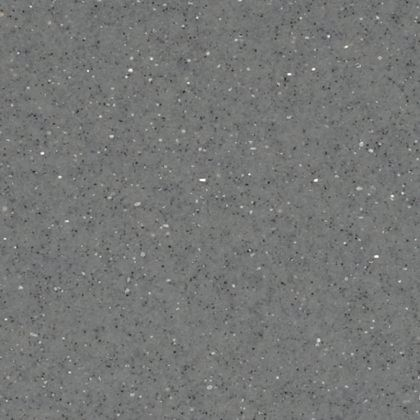)">Introduction</h1>

Rice is the number one food crop in the Philippines and is the staple food for millions of Filipinos that gets them through each day. Therefore, it is of no surprise that the cultivation of rice is one of the biggest in the country, covering about 4.7 million hectares [[2]](#Two), with an average of 4.1 metric tons per hectare yield [[2]](#Two). The Philippines produces about 19 million tons of rice every year [[2]](#Two) and consumes most of it locally while also importing about 3 to 4 million [[3]](#Three) tons from regional trade partners, mostly Vietnam. One of the focuses of the Philippines in recent years has been food sustainability and protecting their local agricultural industry [[4]](#Four). This has been a problem recently since even when the rest of the economy grew a total of 7.6% in 2022 [[4]](#Four), the agricultural sector trailed with only 0.5% growth in 2022 [[4]](#Four). This was partly due to the increasing impact of natural disasters on Philippine Agriculture which was 22.4 billion pesos (in total cost) in 2022 and the rising cost of inputs such as fertilizer, irrigation, seed and fuel [[4]](#Four).

This makes things difficult for the local Filipino farmer. They cannot succeed through sheer diligence and putting in hours of labor. Farming is now a complex industry where skilled labor must manage each part of the process to use the best practices, optimal amounts of fertilizer and pesticides, and even knowing just the right variety of rice to plant based on the conditions of the farm and the land. These are difficult challenges for many farmers who lack access to resources or are working with limited funds and with many costs. In many locations, land is underdeveloped without access to reliable irrigation. Aside from that, machinery or animal labor is still not fully utilized as investment into agriculture is not scaled up. This can be attributed to a lack of capital to invest in infastructure as even farmers need to take loans for inputs every year. The DA alone had lent small and medium farm enterprises over 2.2 billion pesos [[4]](#Four) to sustain their livelihoods, or many might not even be able to afford seeds and fertilizer. Furthermore, many farmers do not even own the land they work, with only about 60% of farms self-owned [[4]](#Four).

To understand and to address some of the problems in this situation, our study focuses on the question of what kind of rice breed a farmer should grow. We focus on Hybrid vs. Inbred rice strains since these are the biggest choice for many farmers, and it is often at the start of the season when farmers have to make the choice about what variety of rice that they need to plant. The study will examine the factors that affect rice yields for hybrid and inbred rice, see if there is a significant difference in yields between the two, and examine the factors that may affect yields for these breeds differently. Finally, certain conditions for farmers that would impact what kind of rice strain that they should grow would also be proposed.

<h1 style="color: #E4E2D4; padding: 10px 10px 10px 10px; background-image:url(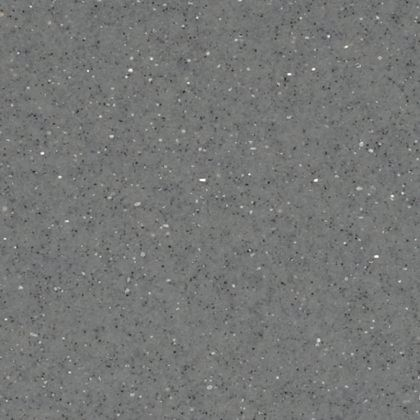)">Research Questions</h1>

<p>Given that introducing the hybrid rice variant to the Filipino farmers may prove as a game-changer to their livelihoods, the team proposed answering these research questions which are primarily focused on comparing the yield and profitability of both breeds:</p>
<ol style="list-style-type: upper-roman;list-style-type: upper-roman;">
    <li>Is there a significant difference between the mean yield per hectare of hybrid rice and inbred rice?</li>
    <li>Is there a significant difference between the mean yield per hectare of hybrid and inbred rice, given similar gravity irrigation system?</li>
    <li>Is there at least one significant difference among the mean yield per hectare of the two breeds, given different land elevations? If there is, which breed-land elevation pair/s has/have a significant difference?
    <li>Is there a significant difference between the mean yield per hectare per labor days (total days spent in planting, harvesting, and threshing the rice) of hybrid and inbred rice?</li>
    <li>Lastly, is there a significant difference between the cost (of the seeds) per yield of each breed? Is there also a significant difference between the gross profit per hectare of hybrid and inbred rice? </li>
</ol>
<p>By answering these questions, the appropriate conditions such as land, water availability, and labor days for growing hybrid rice (and inbred rice) may be ascertained, and most importantly, the important question of knowing whether hybrid rice provides more financial benefit to the Filipino farmers may be answered. 

<h1 style="color: #E4E2D4; padding: 10px 10px 10px 10px; background-image:url(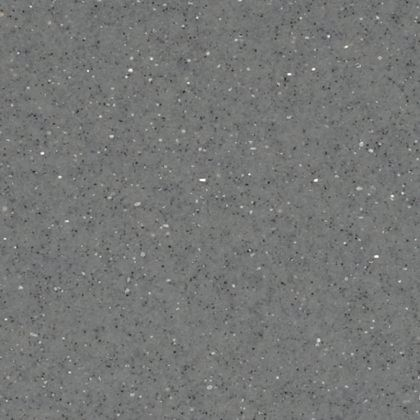)">Methodology</h1>

<h3 style='font-family: serif'><b><i>Data Description (Scope and Limitations)</i></b></h3>

<p>The dataset for the study is from a study done by Ellanie Cabrera in 2014 called "Socio-Economic Evaluation of Hybrid Rice Cultivation in the Philippines". Here, they studied the yield and profitability of hybrid and inbred grains.</p>

<center><img src='first_plot.png'/></center>

<center><b>Figure 1.</b> Inbred vs. Hybrid Data Entries per Province</center>

<p>The dataset originally contains 325 rows and 126 columns. It is only constrained to the provinces of Bukidnon and Isabela, with 6 villages and a total of 673 hectares of farm data. There were 44 varieties of rice grown in these farms, but these varieties were simplified to both their primary groups, hybrid and inbred rice. Lastly, each data point in the dataset represents a plot of land which was planted with either hybrid or inbred rice, which proves that each data point is independently sampled.</p>

<p>Due to the limitations of the dataset, it only covers the wet season of 2005 and the wet season of 2006.  There were a total of 128 unique farms, but a total of 324 plots of land over the two seasons. This also only covered a limited area for two provinces, so there may be some information lacking in the dataset's features.</p>

With this, the methodology or how the study was undertaken is divided into three parts:
<ol>
    <li>Data Preprocessing</li>
    <li>Exploratory Data Analysis</li>
    <li>Hypothesis Testing</li>
</ol>

<img src='acs-v3.webp'/>

<h3 style='font-family: serif'><b><i>Data Preprocessing</i></b></h3>

<p>The dataset is first loaded using the pandas module, where it is converted into a dataframe.</p>
    
<p>After checking the dataset for null or empty values, it was found that only one row needed to be dropped since there was no yield data, and there were otherwise no missing values in the dataset.</p>

<p>Feature engineering was conducted on the dataset to get aggregate values for the <b>yield per hectare, total cost, yield in KG, and total labor days</b> for more points to consider and explore in the exploratory data analysis and to better represent the data.</p>

<p>Finally, columns were renamed and then rows were split into two working datasets for inbred and hybrid rice for easier parsing and data analysis.</p>

<p>Features related to rice growth conditions, inputs, and total yields were more focused on so there would be a clearer picture of the rice yield situation.</p>

In [152]:
# Load Excel sheet
df_raw = pd.read_excel('costs_and_return_cleaned.xlsx')

cols = df_raw.columns
df_raw.fillna(0, inplace=True)
df_farm = df_raw[['PROV', 'MUN', 'VIL', 'Fno', 'RECNO',
                 'LANDEL1', 'LANDEL2', 'LANDEL3', 'TENURE 1', 'TENURE 2',
                  'TENURE 3', 'TENURE 4', 'TENURE 5',
                 'IRRIG 1', 'IRRIG 2', 'IRRIG 3', 'HHAGE', 'HHEDU (Years)',
                  'HHOCC', 'HHSIZE', 'MHMA15Y', 'FHMA15Y',
                 'FSIZEha', 'SEASON','SEASON.1', 'AREA', 
                 ]]

df_rice = df_raw[['Fno', 'RECNO','SEASON','SEASON.1', 'AREA', 
                 'Hybrid', 'Inbred', 'VAR', 'MESTB1', 'MESTB2',
                 'SEEDQ','SBED1', 'SBED2', 'SBAREA', 
                 'AGEHS','PROD', 'WEIGHT', 'PRIKG', 'SOLD', 
                 'LLSHA', 'HVTHSH', 'PLSHA', 'RENT', 'HOMECO',
                 'SAVED', 'GIVEA', 'PAIDC', 'OTH',
                 ]]

df_cost = df_raw[['SEEDC', 'SEEDPR', 'SBINP',
                 'LPRENT', 'LPRANI', 'LPFUEL', 'LPHLC', 
                 'LPFOOD','CEBS', 'CEPBS', 'CEFOOD',
                 'IRFUEL', 'IRRNIA','IRHLC', 'IRFOOD',
                 'FAFOOD', 'FRTCST', 'OFCST', 'INSCST',
                 'FUNCST','HERBC', 'HHLC','HWHLC',
                 'HWFOOD', 'RATLC','RATCST', 'HVCST',
                 'HVFOOD', 'THHLC','THFUEL','THFOOD',
                 'TPLCST', 'IFLCST', 'HLCST', 'LABCST', 'PSTCST',
                 'AMCST']]

# Drop incorrect data
df_raw = df_raw.drop(263)
df_farm = df_farm.drop(263)
df_cost = df_cost.drop(263)
df_rice = df_rice.drop(263)

# Rename columns in df_rice
cols = ['Fno', 'RECNO', 'Wet Season', 'Dry Season', 'Area', 'Hybrid', 'Inbred', 
        'Variety', 'Direct Seed', 'Transplant',
       'Amt of Seed', 'Seedbed Type1', 'Seedbed Type2', 'Seedbed Area', 
        'Transplant Age of Rice', 
       'Yield in Cavan', 'kg/Cavan', 'PRIKG',
       'KG sold', 'KG Landlord', 'KG Harvester/Thresher', 'KG Permanent Labor',
        'KG Rent', 'KG Home', 'KG Seed', 'KG Give',
       'KG Creditor', 'KG Other']
df_rice.columns = cols

# Rename columns in df_cost
cols = ['Seed Cost', 'Seedbed Prep Cost', 'Seedbed Input Mat Cost',
        'Tractor Rent Cost', 'Carabao Rent Cost', 'Fuel Cost', 
        'Land Prep Labor Cost', 'Land Prep Food Cost', 
        'Additional Seedlings Cost', 'Pulling and Bundling Seedlings Cost',
        'Crop Establishment Food Cost', 'Pump Fuel Cost', 'Irr Pump Cost', 
        'Irr Hired Labor Cost', 'Irr Food Cost', 'Fertilizer Food Cost',
        'Fertilizer Cost', 'Organic Fertilizer Cost',
        'Insecticide Cost', 'Fungicide Cost', 'Herbicide Cost',
       'Herbicide Labor Cost', 'Handweeding Labor Cost', 'Handweeding Food Cost',
        'Rat Labor Cost', 'Rodenticide Cost', 'Harvest Labor Cost',
        'Harvest Food Cost', 'Threshing Labor Cost',
       'Thresher Fuel Cost', 'Threshing Food Cost',
        'Total Permanent Labor Cost', 'Imputed Family labor cost',
        'Hired Labor Cost', 'Labor Cost', 'Pesticide Cost',
        'Animal and Mechanical Cost']
df_cost.columns = cols

# Add yield per ha feature
df_rice['Yield in KG'] = df_rice['Yield in Cavan']*df_rice['kg/Cavan']
df_rice['KG per ha'] = df_rice['Yield in KG']/df_rice['Area']

# Create total cost and total labor features
df_cost['Total Cost'] = (df_cost['Labor Cost'] + df_cost['Pesticide Cost'] +
                         df_cost['Animal and Mechanical Cost'])

# New dataframe to examine rice yield
# df_rice_yields = pd.concat([df_rice, df_cost], axis=1)
# df_rice_yields['Cost per KG Grown'] = (df_rice_yields['Total Cost'] /
#                                        df_rice_yields['KG per ha'])

# Combine them back together
df_all = pd.concat([df_rice, df_farm, df_cost], axis=1)

# Add some compound features
df_all['Total Labor Days'] = df_raw[['FLSB', 'LPHLD', 'LPFLD', 'LPEXD', 
                                     'CEHLD', 'CEFLD', 'CEELD', 'IRFLD',
       'IRHLD', 'FAHLD', 'FAFLD', 'FAELD', 'INSHLD', 'INSFLD', 'FUNHLD',
       'FUNFLD', 'HHLD', 'HFLD', 'HWFLD', 'HVHLD', 'HVFLD', 'THHLD', 'THFLD',
       'TPLD']].sum(axis=1)

df_hybrid = df_all[df_all['Hybrid'] == 1]
df_inbred = df_all[df_all['Inbred'] == 1]

<p><b>Table 2.</b></p>
<p><i>Cleaned Rice Dataset DataFrame</i></p>

In [153]:
df_all.head(3)

,Fno,RECNO,Wet Season,Dry Season,Area,Hybrid,Inbred,Variety,Direct Seed,Transplant,Amt of Seed,Seedbed Type1,Seedbed Type2,Seedbed Area,Transplant Age of Rice,Yield in Cavan,kg/Cavan,PRIKG,KG sold,KG Landlord,KG Harvester/Thresher,KG Permanent Labor,KG Rent,KG Home,KG Seed,KG Give,KG Creditor,KG Other,Yield in KG,KG per ha,PROV,MUN,VIL,Fno,RECNO,LANDEL1,LANDEL2,LANDEL3,TENURE 1,TENURE 2,TENURE 3,TENURE 4,TENURE 5,IRRIG 1,IRRIG 2,IRRIG 3,HHAGE,HHEDU (Years),HHOCC,HHSIZE,MHMA15Y,FHMA15Y,FSIZEha,SEASON,SEASON.1,AREA,Seed Cost,Seedbed Prep Cost,Seedbed Input Mat Cost,Tractor Rent Cost,Carabao Rent Cost,Fuel Cost,Land Prep Labor Cost,Land Prep Food Cost,Additional Seedlings Cost,Pulling and Bundling Seedlings Cost,Crop Establishment Food Cost,Pump Fuel Cost,Irr Pump Cost,Irr Hired Labor Cost,Irr Food Cost,Fertilizer Food Cost,Fertilizer Cost,Organic Fertilizer Cost,Insecticide Cost,Fungicide Cost,Herbicide Cost,Herbicide Labor Cost,Handweeding Labor Cost,Handweeding Food Cost,Rat Labor Cost,Rodenticide Cost,Harvest Labor Cost,Harvest Food Cost,Threshing Labor Cost,Thresher Fuel Cost,Threshing Food Cost,Total Permanent Labor Cost,Imputed Family labor cost,Hired Labor Cost,Labor Cost,Pesticide Cost,Animal and Mechanical Cost,Total Cost,Total Labor Days
0,1,1,1.0,1,8.0,1.0,0.0,M3,0.0,1.0,160.0,0.0,1.0,0.10,22,840.0,48.0,8.0,500.0,0.0,0.0,80.0,0.0,200.0,60.0,0.0,0.0,0.0,40320.0,5040.0,ISABELA,CAUAYAN CITY,SAN FRANCISCO,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50,6,1,7,3,0,8.0,1.0,1,8.0,6000.0,0,0.0,0,0,6000.0,0.0,0,0,4800,0,0.0,9600.0,0,0,0,59780.0,0.0,7760.0,8200.0,0.0,0,0,0,0,0,22400.0,0,5600.0,5000,0,30720.0,450.00000,45200.0,76370.00000,15960.0,0,92330.00000,632.00
1,2,2,1.0,1,0.6,1.0,0.0,72H,0.0,1.0,20.0,1.0,0.0,0.04,22,71.0,51.0,9.0,16.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,2.0,3621.0,6035.0,ISABELA,CAUAYAN CITY,SAN FRANCISCO,2,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,65,4,1,4,2,0,1.5,1.0,1,0.6,750.0,0,68.0,800,80,0.0,0.0,0,0,700,0,0.0,918.0,0,0,0,2360.0,0.0,288.0,300.0,480.0,60,0,0,0,0,1620.0,0,2138.0,0,0,0.0,468.66650,6298.0,6766.66650,1068.0,880,8714.66650,32.90
2,3,2,1.0,1,0.9,1.0,0.0,M3,0.0,1.0,40.0,1.0,0.0,0.06,22,72.0,51.0,10.0,24.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,3.0,3672.0,4080.0,ISABELA,CAUAYAN CITY,SAN FRANCISCO,3,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,65,4,1,4,2,0,1.5,1.0,1,0.9,650.0,0,102.0,1200,120,0.0,0.0,0,0,1050,0,0.0,1377.0,0,0,0,3540.0,0.0,432.0,450.0,720.0,90,0,0,0,0,2430.0,0,3207.0,0,0,0.0,702.99975,9447.0,10149.99975,1602.0,1320,13071.99975,49.35


<h3 style='font-family: serif'><b><i>Exploratory Data Analysis</i></b></h3>

<h4 style='font-family: serif'><i>Overview Descriptive Statistics</i></h4>

<p><b>Table 3.</b></p>
<p><i>Descriptive Statistics of the DataFrame</i></p>

In [48]:
df_all.describe()

,Fno,RECNO,Wet Season,Dry Season,Area,Hybrid,Inbred,Direct Seed,Transplant,Amt of Seed,Seedbed Type1,Seedbed Type2,Seedbed Area,Transplant Age of Rice,Yield in Cavan,kg/Cavan,PRIKG,KG sold,KG Landlord,KG Harvester/Thresher,KG Permanent Labor,KG Rent,KG Home,KG Seed,KG Give,KG Creditor,KG Other,Yield in KG,KG per ha,Fno,RECNO,LANDEL1,LANDEL2,LANDEL3,TENURE 1,TENURE 2,TENURE 3,TENURE 4,TENURE 5,IRRIG 1,IRRIG 2,IRRIG 3,HHAGE,HHEDU (Years),HHOCC,HHSIZE,MHMA15Y,FHMA15Y,FSIZEha,SEASON,SEASON.1,AREA,Seed Cost,Seedbed Prep Cost,Seedbed Input Mat Cost,Tractor Rent Cost,Carabao Rent Cost,Fuel Cost,Land Prep Labor Cost,Land Prep Food Cost,Additional Seedlings Cost,Pulling and Bundling Seedlings Cost,Crop Establishment Food Cost,Pump Fuel Cost,Irr Pump Cost,Irr Hired Labor Cost,Irr Food Cost,Fertilizer Food Cost,Fertilizer Cost,Organic Fertilizer Cost,Insecticide Cost,Fungicide Cost,Herbicide Cost,Herbicide Labor Cost,Handweeding Labor Cost,Handweeding Food Cost,Rat Labor Cost,Rodenticide Cost,Harvest Labor Cost,Harvest Food Cost,Threshing Labor Cost,Thresher Fuel Cost,Threshing Food Cost,Total Permanent Labor Cost,Imputed Family labor cost,Hired Labor Cost,Labor Cost,Pesticide Cost,Animal and Mechanical Cost,Total Cost,Cost per KG Grown,Total Labor Days
count,324.000000,324.000000,324.000000,324.0,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.0,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.00000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,161.787037,66.509259,0.506173,1.0,2.076667,0.540123,0.459877,0.509259,0.490741,145.470525,0.148148,0.336420,1.266929,10.552469,209.999641,46.137654,9.177284,130.405704,2.743210,26.547781,10.328210,2.124188,24.035000,2.913580,0.640432,9.871296,0.221914,9570.203704,4729.590657,161.787037,66.509259,0.194444,0.382716,0.432099,0.555556,0.070988,0.104938,0.231481,0.037037,0.966049,0.027778,0.018519,49.367284,9.864198,0.827160,4.839506,1.966049,1.641975,4.148765,0.506173,1.0,2.076667,3257.946944,69.691358,98.288889,1930.820988,134.290123,1000.771605,850.780459,70.555556,1.728395,635.601852,17.561728,305.511111,2492.271420,59.938272,8.333333,21.820988,11003.945679,1177.501596,1324.263272,1125.354167,1261.256559,134.663580,130.030864,11.25000,7.530864,14.783951,6758.773394,5.555556,5676.356902,102.851852,6.172840,4345.606914,1122.158540,17261.663327,22729.428780,3725.657948,2065.111111,28520.197839,6.790332,192.002932
std,93.786701,37.035209,0.500735,0.0,2.195546,0.499158,0.499158,0.500688,0.500688,244.069197,0.355796,0.473215,22.220566,10.819674,231.991308,5.800299,1.221095,182.530358,8.561571,34.694894,21.807798,7.793696,38.784546,9.147921,1.988637,45.411847,0.880287,10154.901457,1359.910264,93.786701,37.035209,0.396385,0.486802,0.496134,0.497673,0.257201,0.306948,0.422432,0.189145,0.181382,0.164590,0.135025,13.423478,3.752409,0.378693,1.920763,1.157325,1.143658,6.060735,0.500735,0.0,2.195546,6275.648968,200.146766,332.065788,5513.800692,289.014214,1662.007827,2102.700119,304.615679,17.998288,2480.847378,69.623574,1749.083619,2897.742063,276.117481,41.786721,113.664348,13213.497578,4255.447957,2243.794068,1804.925916,1329.534679,308.263569,555.835053,83.01346,104.128771,77.272284,7505.670328,35.627936,6

<h4 style='font-family: serif'><i>Mean Yield per Hectare of Hybrid Rice vs. Inbred Rice</i></h4>

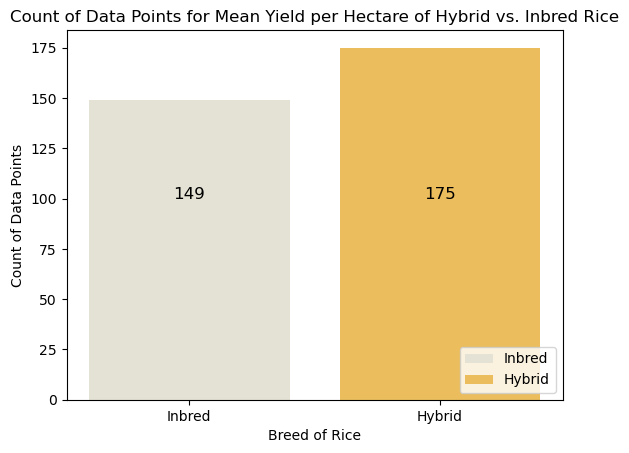

In [61]:
data1 = df_inbred['KG per ha']
data2 = df_hybrid['KG per ha']


count1 = len(data1)
count2 = len(data2)

plt.bar('Inbred', count1, color='#E4E2D4')
plt.bar('Hybrid', count2, color='#EBBD5D')
plt.title('Count of Data Points for Mean Yield per Hectare of Hybrid vs. Inbred Rice')
plt.ylabel('Count of Data Points')
plt.xlabel('Breed of Rice')
plt.legend(['Inbred', 'Hybrid'], loc='lower right')
plt.text(0, 100, count1, fontsize=12, horizontalalignment='center')
plt.text(1, 100, count2, fontsize=12, horizontalalignment='center')
plt.show()

<center><b>Figure 2.</b> Count of Data Points for Mean Yield per Hectare Hybrid vs. Inbred Rice</center>

This figure can be used as a support for how despite not knowing the population standard deviation, Z-test can still be used for comparing the mean yields of both groups, given that the sample sizes of both groups are greater than 30.

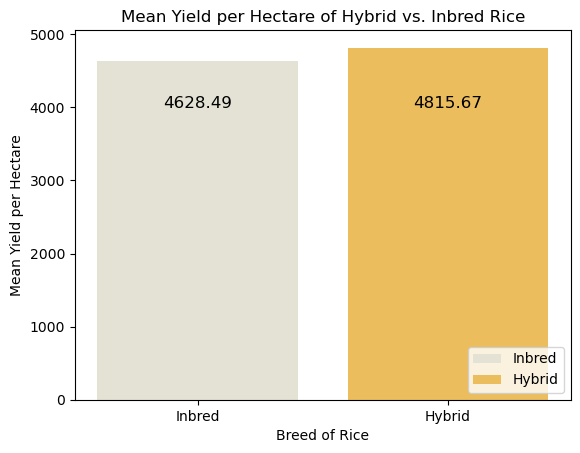

In [64]:
data1 = df_inbred['KG per ha']
data2 = df_hybrid['KG per ha']

mean1 = np.mean(data1)
mean2 = np.mean(data2)

plt.bar('Inbred', mean1, color='#E4E2D4')
plt.bar('Hybrid', mean2, color='#EBBD5D')
plt.title('Mean Yield per Hectare of Hybrid vs. Inbred Rice')
plt.ylabel('Mean Yield per Hectare')
plt.xlabel('Breed of Rice')
plt.legend(['Inbred', 'Hybrid'], loc='lower right')
plt.text(0, 4000, f'{mean1:.2f}', fontsize=12, horizontalalignment='center')
plt.text(1, 4000, f'{mean2:.2f}', fontsize=12, horizontalalignment='center')
plt.show()

<center><b>Figure 3.</b> Mean Yield per Hectare of Hybrid vs. Inbred Rice</center>

Given that the comparison of the mean yield per hectare between the two breeds would be delved into in the hypothesis testing phase, it can be seen from this figure that there is an apparent difference in mean yield per hectare between the two breeds. This further necessitates the need for proving whether there is indeed a significant difference between their mean yields per hectare.

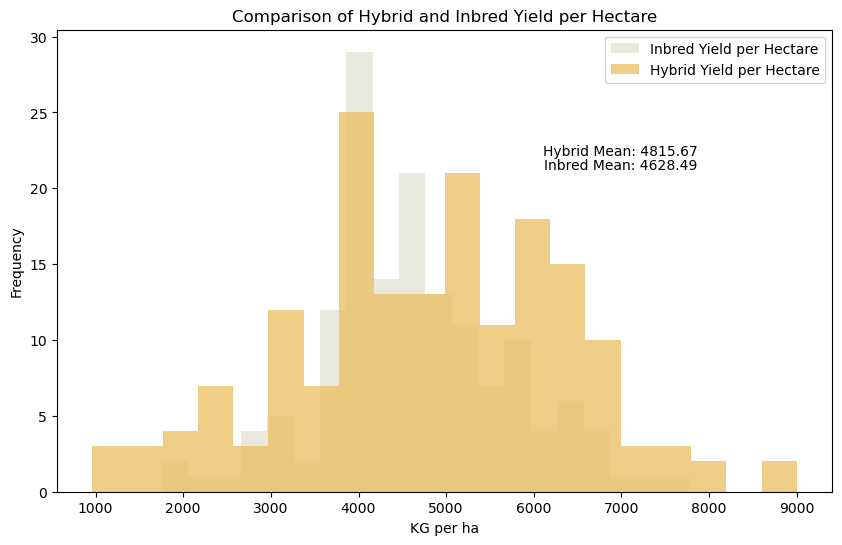

In [66]:
data1 = df_inbred['KG per ha']
data2 = df_hybrid['KG per ha']

mean1 = np.mean(data1)
mean2 = np.mean(data2)

plt.figure(figsize=(10, 6))
plt.hist(data1, bins=20, alpha=0.75, label='Inbred Yield', color='#E4E2D4')
plt.hist(data2, bins=20, alpha=0.75, label='Hybrid Yield', color='#EBBD5D')
height = 22
plt.text(data1.max()*.9, height, f'Inbred Mean: {mean1:.2f}', color='black', fontsize=10, ha='center', va='top')
plt.text(data1.max()*.9, height, f'Hybrid Mean: {mean2:.2f}', color='black', fontsize=10, ha='center', va='bottom')

plt.title('Comparison of Hybrid and Inbred Yield per Hectare')
plt.legend(['Inbred Yield per Hectare', 'Hybrid Yield per Hectare'])
plt.xlabel('KG per ha')
plt.ylabel('Frequency')
plt.show()

<center><b>Figure 4.</b> Yield per Hectare of Hybrid vs. Inbred Rice Histogram</center>

<p>As seen here in this figure, both groups approximately follow a normal distribution, which further supports that Z-test, which requires that the data points are normally distributed, can be used in comparing the means of both groups. Moreover, given the wider distribution of the hybrid yield, it can be said that it varies more than the inbred yield, which means that it is not as consistent as the inbred yield in producing mean yields per hectare. Lastly, there are no extreme outliers in both groups, which is further supported by the box-plots below.

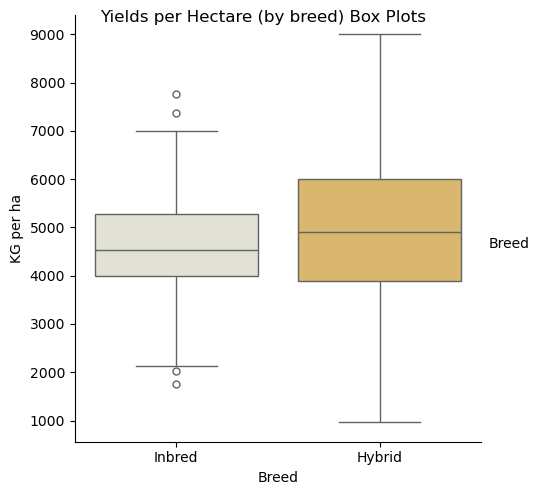

In [67]:
df_data = df_all
df_data['Breed'] = np.where(df_data['Hybrid'] == 1, 'Hybrid', 'Inbred')
df_data = df_data[['KG per ha', 'Breed']]
a = sns.catplot(data = df_data,
                   x = 'Breed',
                   y = 'KG per ha',
                   hue = 'Breed',
                   kind = 'box',
                   order = ['Inbred', 'Hybrid'],
                   palette = ['#EBBD5D', '#E4E2D4'])
a.fig.suptitle('Yields per Hectare (by breed) Box Plots')
plt.show()

<center><b>Figure 5.</b> Yield per Hectare of Hybrid vs. Inbred Rice Box Plots</center>

This figure further supports how the yield per hectare of the hybrid rice has a wider distribution the inbred rice. Moreover, although there are outliers in the inbred rice group, they are not extreme and would skew the mean of the inbred rice very much. And so, they would not be dropped from the dataset.

<h4 style='font-family: serif'><i>Mean Yield per Hectare of Hybrid Rice vs. Inbred Rice Given A Gravity-based Irrigation System</i></h4>

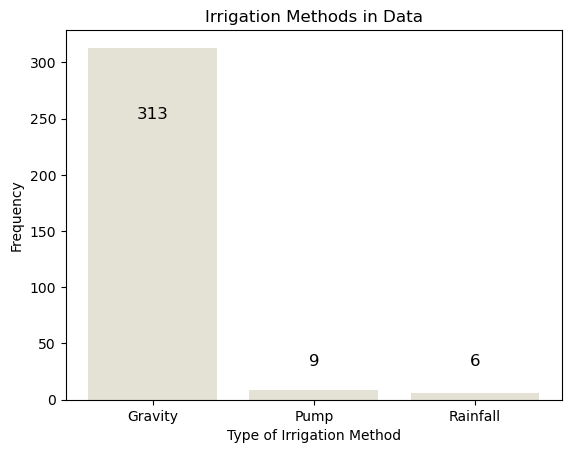

In [56]:
a=df_farm[(df_farm['IRRIG 1']==1)].count().iloc[0]
b=df_farm[(df_farm['IRRIG 2']==1)].count().iloc[0]
c=df_farm[(df_farm['IRRIG 3']==1)].count().iloc[0]
plt.bar(['Gravity','Pump','Rainfall'], [a, b, c],
       color=['#E4E2D4', '#E4E2D4', '#E4E2D4'])
plt.title('Irrigation Methods in Data')
plt.xlabel('Type of Irrigation Method')
plt.ylabel('Frequency')
plt.text(0, 250, a, fontsize=12, horizontalalignment='center')
plt.text(1, 30, b, fontsize=12, horizontalalignment='center')
plt.text(2, 30, c, fontsize=12, horizontalalignment='center')
plt.show()

<center><b>Figure 6.</b> Frequency of Data Points for Each Irrigation Method</center>

As seen in the figure above, other irrigation methods such as pump and rainfall do not have high frequencies, and so, it would be difficult to compare their mean yield per hectare, given that they would not be able to approximate a normal distribution and would not reach the given rule-of-thumb of a sample size of at least 15 data points for each group (given 2-9 groups) [[5]](#Five), which is a prerequisite for Analysis of Variance (ANOVA), which would allow for comparison of means between groups. Given this, it would be better to focus instead on whether there is a significant difference between the yield per hectare of each breed given a gravity-based irrigation method.

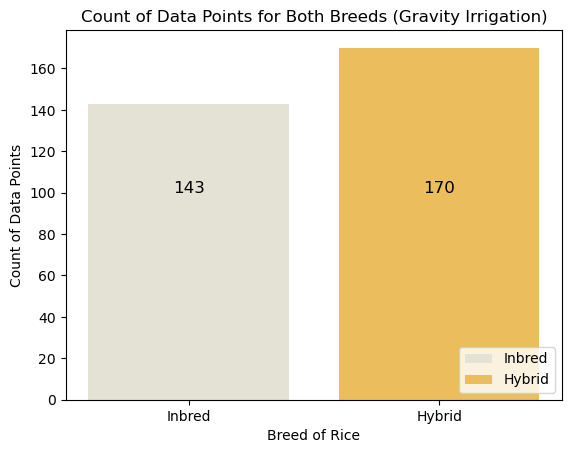

In [78]:
data1 = df_all[(df_all['IRRIG 1']==1)&(df_all['Inbred']==1)]['KG per ha']
data2 = df_all[(df_all['IRRIG 1']==1)&(df_all['Hybrid']==1)]['KG per ha']

count1 = len(data1)
count2 = len(data2)

plt.bar('Inbred', count1, color='#E4E2D4')
plt.bar('Hybrid', count2, color='#EBBD5D')
plt.title('Count of Data Points for Both Breeds (Gravity Irrigation)')
plt.ylabel('Count of Data Points')
plt.xlabel('Breed of Rice')
plt.legend(['Inbred', 'Hybrid'], loc='lower right')
plt.text(0, 100, count1, fontsize=12, horizontalalignment='center')
plt.text(1, 100, count2, fontsize=12, horizontalalignment='center')
plt.show()

<center><b>Figure 7.</b> Frequency of Data Points (Gravity Irrigation)</center>

Focusing on both breeds given a gravity-based irrigation system, both are greater than 30, and so, similarly, Z-test can also be used to compare both groups' mean yields per hectare.

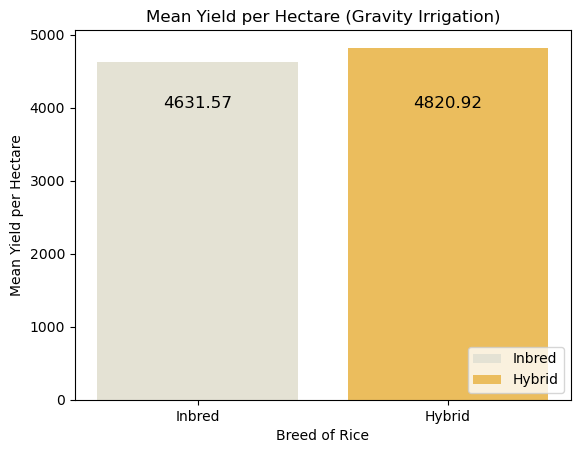

In [79]:
data1 = df_all[(df_all['IRRIG 1']==1)&(df_all['Inbred']==1)]['KG per ha']
data2 = df_all[(df_all['IRRIG 1']==1)&(df_all['Hybrid']==1)]['KG per ha']

mean1 = np.mean(data1)
mean2 = np.mean(data2)

plt.bar('Inbred', mean1, color='#E4E2D4')
plt.bar('Hybrid', mean2, color='#EBBD5D')
plt.title('Mean Yield per Hectare (Gravity Irrigation)')
plt.ylabel('Mean Yield per Hectare')
plt.xlabel('Breed of Rice')
plt.legend(['Inbred', 'Hybrid'], loc='lower right')
plt.text(0, 4000, f'{mean1:.2f}', fontsize=12, horizontalalignment='center')
plt.text(1, 4000, f'{mean2:.2f}', fontsize=12, horizontalalignment='center')
plt.show()

<center><b>Figure 8.</b> Mean Yield per Hectare of Hybrid vs. Inbred Rice (Gravity Irrigation)</center>

Similarly, from this figure, it can be said that there is a possible significant difference between the mean yields of both groups, although this would be confirmed through a hypothesis test.

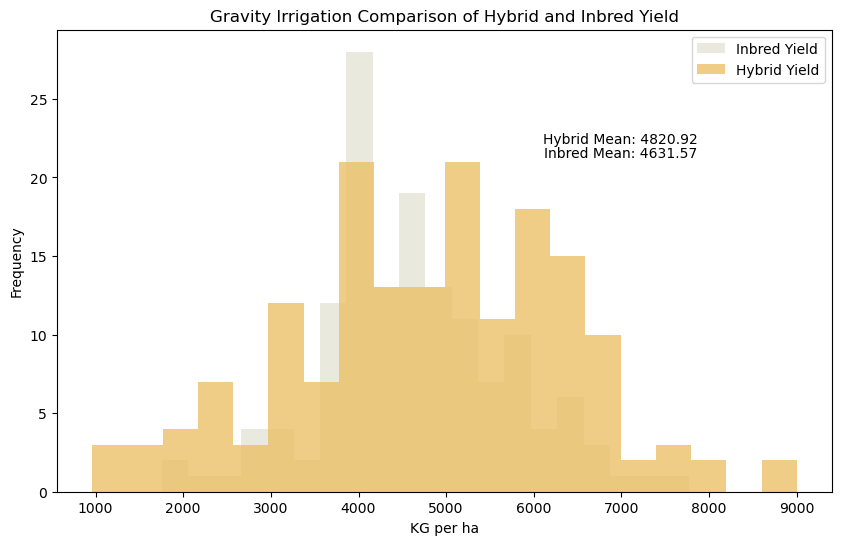

In [75]:
data1 = df_all[(df_all['IRRIG 1']==1)&(df_all['Inbred']==1)]['KG per ha']
data2 = df_all[(df_all['IRRIG 1']==1)&(df_all['Hybrid']==1)]['KG per ha']

mean1 = np.mean(data1)
mean2 = np.mean(data2)

plt.figure(figsize=(10, 6))
plt.hist(data1, bins=20, alpha=0.75, label='Inbred Yield', color='#E4E2D4')
plt.hist(data2, bins=20, alpha=0.75, label='Hybrid Yield', color='#EBBD5D')
height = 22
plt.text(data1.max()*.9, height, f'Inbred Mean: {mean1:.2f}', color='black', fontsize=10, ha='center', va='top')
plt.text(data1.max()*.9, height, f'Hybrid Mean: {mean2:.2f}', color='black', fontsize=10, ha='center', va='bottom')

plt.title('Gravity Irrigation Comparison of Hybrid and Inbred Yield')
plt.legend(['Inbred Yield', 'Hybrid Yield'])
plt.xlabel('KG per ha')
plt.ylabel('Frequency')
# ztest(data1, data2)
# print('Hybrid std',data1.std(), '\nInbred std',data2.std())
plt.show()

<center><b>Figure 9.</b> Gravity Irrigation Comparison of Hybrid and Inbred Yield</center>

Similarly, from this figure, it can be said that the hybrid yield has a wider distribution again than the inbred yield and that they both follow approximately a normal distribution. This further supports how the Z-test can be used for the hypothesis associated with both groups.

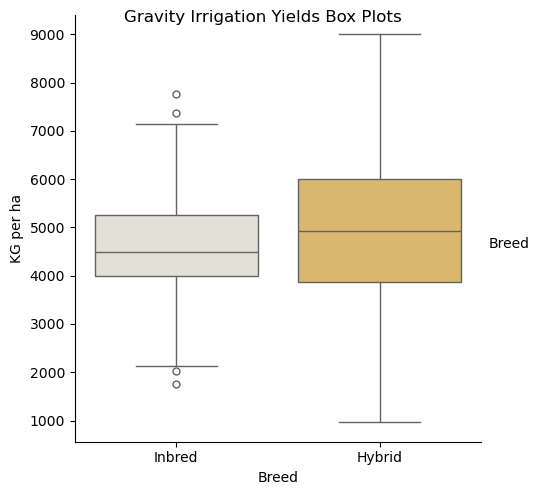

In [81]:
df_data = df_all
df_data['Breed'] = np.where(np.logical_and(df_data['Hybrid'] == 1,
                                          df_data['IRRIG 1'] == 1),
                                          'Hybrid', 'Inbred')
df_data = df_data[['KG per ha', 'Breed']]
a = sns.catplot(data = df_data,
                   x = 'Breed',
                   y = 'KG per ha',
                   hue = 'Breed',
                   kind = 'box',
                   order = ['Inbred', 'Hybrid'],
                   palette = ['#EBBD5D', '#E4E2D4'])
a.fig.suptitle('Gravity Irrigation Yields Box Plots')
plt.show()

<center><b>Figure 10.</b> Yield per Hectare of Hybrid vs. Inbred Rice (Gravity Irrigation) Box Plots</center>

Similarly, this figure is very similar to the box plot, and so, the same interpretation that there are no <b>extreme</b> outliers in both groups in this section still holds.

<h4 style='font-family: serif'><i>Mean Yield per Hectare Across Land Elevations</i></h4>

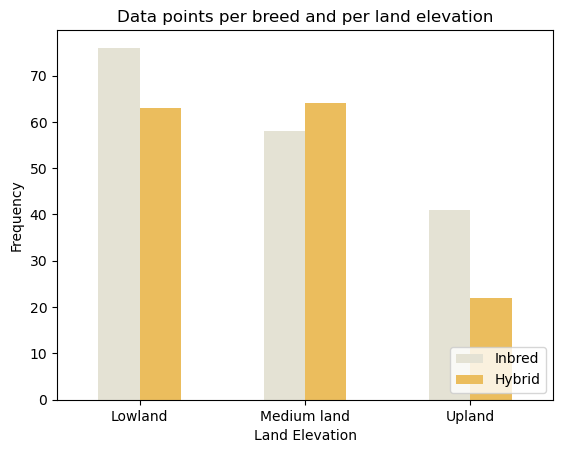

In [224]:
data1 = df_inbred
data2 = df_hybrid
data1['Land Elevation'] = np.where(data1['LANDEL1'] == 1, 'Upland', np.where(data1['LANDEL2'] == 1, 'Medium land',
            np.where(data1['LANDEL3'] == 1, 'Lowland', np.nan)))
data2['Land Elevation'] = np.where(data2['LANDEL1'] == 1, 'Upland', np.where(data2['LANDEL2'] == 1, 'Medium land',
            np.where(data2['LANDEL3'] == 1, 'Lowland', np.nan)))
data1['Breed'] = 'Inbred'
data2['Breed'] = 'Hybrid'
data1_up = data1[data1['Land Elevation'] == 'Upland'][['KG per ha', 'Land Elevation', 'Breed']]
data1_mid = data1[data1['Land Elevation'] == 'Medium land'][['KG per ha', 'Land Elevation', 'Breed']]
data1_low = data1[data1['Land Elevation'] == 'Lowland'][['KG per ha', 'Land Elevation', 'Breed']]
data2_up = data2[data2['Land Elevation'] == 'Upland'][['KG per ha', 'Land Elevation', 'Breed']]
data2_mid = data2[data2['Land Elevation'] == 'Medium land'][['KG per ha', 'Land Elevation', 'Breed']]
data2_low = data2[data2['Land Elevation'] == 'Lowland'][['KG per ha', 'Land Elevation', 'Breed']]
data_overall = pd.concat((data1_up, data1_mid, data1_low, data2_up, data2_mid, data2_low), axis=0)

data_pivot = data_overall.pivot_table(index='Land Elevation', columns='Breed', values='KG per ha', aggfunc='count')
data_pivot.plot(kind='bar', color=['#E4E2D4', '#EBBD5D'], rot=0)

plt.title('Data points per breed and per land elevation')
plt.ylabel('Frequency')
plt.xlabel('Land Elevation')
plt.legend(['Inbred', 'Hybrid'], loc='lower right')
plt.show()

<center><b>Figure 11.</b> Frequency of Data Points Per Breed and Per Land Elevation</center>

As seen here in this figure, most of the plot of lands are in the lowland and in the medium land, as compared to the upland. Moreover, the plots of land where hybrid is planted and inbred is planter differs across land elevations. Since one-way analysis of variance (ANOVA) would be the best hypothesis test for this, in order to maintain robust statistical power, each pair would be truncated to the number of data points in the pair with lowest sample size, i.e., upland-hybrid pair where 22, the number of the hybrid-upland pairs are enough for the sample size especially for ANOVA involving six groups (where the rule-of-thumb is at least 15). [[5]](#Five)

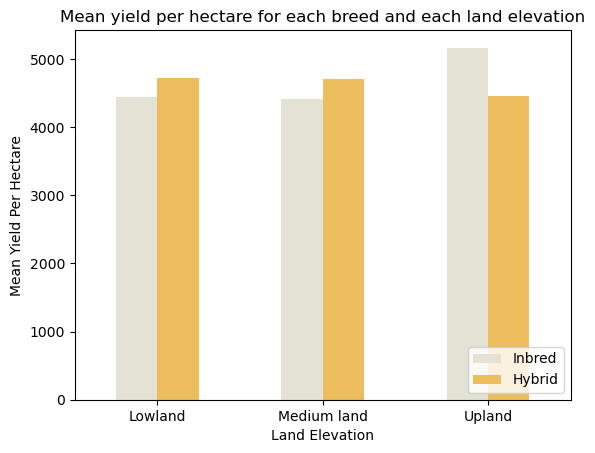

In [226]:
data1 = df_inbred
data2 = df_hybrid
data1['Land Elevation'] = np.where(data1['LANDEL1'] == 1, 'Upland', np.where(data1['LANDEL2'] == 1, 'Medium land',
            np.where(data1['LANDEL3'] == 1, 'Lowland', np.nan)))
data2['Land Elevation'] = np.where(data2['LANDEL1'] == 1, 'Upland', np.where(data2['LANDEL2'] == 1, 'Medium land',
            np.where(data2['LANDEL3'] == 1, 'Lowland', np.nan)))
data1['Breed'] = 'Inbred'
data2['Breed'] = 'Hybrid'
data1_up = data1[data1['Land Elevation'] == 'Upland'][['KG per ha', 'Land Elevation', 'Breed']][:22]
data1_mid = data1[data1['Land Elevation'] == 'Medium land'][['KG per ha', 'Land Elevation', 'Breed']][:22]
data1_low = data1[data1['Land Elevation'] == 'Lowland'][['KG per ha', 'Land Elevation', 'Breed']][:22]
data2_up = data2[data2['Land Elevation'] == 'Upland'][['KG per ha', 'Land Elevation', 'Breed']][:22]
data2_mid = data2[data2['Land Elevation'] == 'Medium land'][['KG per ha', 'Land Elevation', 'Breed']][:22]
data2_low = data2[data2['Land Elevation'] == 'Lowland'][['KG per ha', 'Land Elevation', 'Breed']][:22]
data_overall = pd.concat((data1_up, data1_mid, data1_low, data2_up, data2_mid, data2_low), axis=0)

data_pivot = data_overall.pivot_table(index='Land Elevation', columns='Breed', values='KG per ha', aggfunc='mean')
data_pivot.plot(kind='bar', color=['#E4E2D4', '#EBBD5D'], rot=0)

plt.title('Mean yield per hectare for each breed and each land elevation')
plt.ylabel('Mean Yield Per Hectare')
plt.xlabel('Land Elevation')
plt.legend(['Inbred', 'Hybrid'], loc='lower right')
plt.show()

<center><b>Figure 12.</b> Mean Yield per Hectare Per Breed and Per Land Elevation</center>

As seen here, there is not much difference for the mean yield per hectare for all given pairs. However, there seems to be significant differences in the mean yield per hectare for the upland pairs where inbred rice has higher yield per hectare for both.

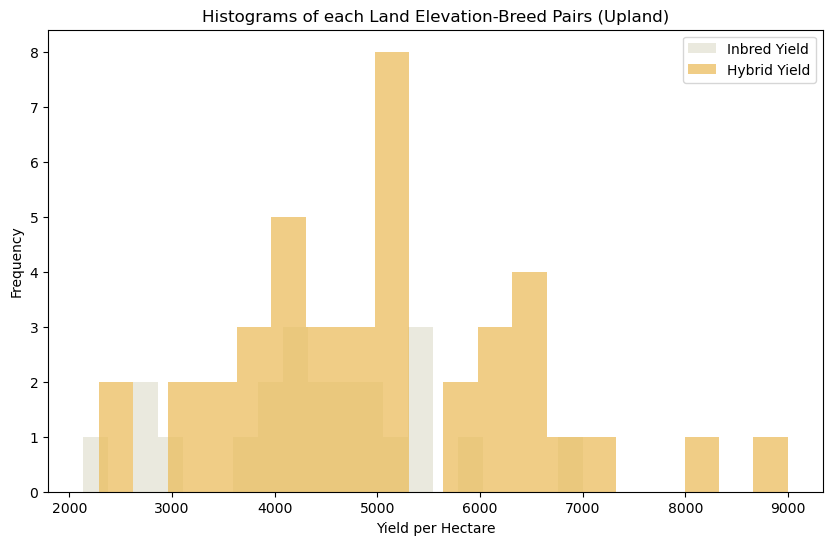

In [234]:
data1 = df_inbred
data2 = df_hybrid
data1['Land Elevation'] = np.where(data1['LANDEL1'] == 1, 'Upland', np.where(data1['LANDEL2'] == 1, 'Medium land',
            np.where(data1['LANDEL3'] == 1, 'Lowland', np.nan)))
data2['Land Elevation'] = np.where(data2['LANDEL1'] == 1, 'Upland', np.where(data2['LANDEL2'] == 1, 'Medium land',
            np.where(data2['LANDEL3'] == 1, 'Lowland', np.nan)))
data1['Breed'] = 'Inbred'
data2['Breed'] = 'Hybrid'
data1_up = data1[data1['Land Elevation'] == 'Upland'][['KG per ha', 'Land Elevation', 'Breed']]
data1_mid = data1[data1['Land Elevation'] == 'Medium land'][['KG per ha', 'Land Elevation', 'Breed']]
data1_low = data1[data1['Land Elevation'] == 'Lowland'][['KG per ha', 'Land Elevation', 'Breed']]
data2_up = data2[data2['Land Elevation'] == 'Upland'][['KG per ha', 'Land Elevation', 'Breed']]
data2_mid = data2[data2['Land Elevation'] == 'Medium land'][['KG per ha', 'Land Elevation', 'Breed']]
data2_low = data2[data2['Land Elevation'] == 'Lowland'][['KG per ha', 'Land Elevation', 'Breed']]

plt.figure(figsize=(10, 6))
plt.hist(data1_up['KG per ha'], bins=20, alpha=0.75, label='Inbred-Upland', color='#E4E2D4')
plt.hist(data2_up['KG per ha'], bins=20, alpha=0.75, label='Hybrid-Upland', color='#EBBD5D')

plt.title('Histograms of each Land Elevation-Breed Pairs (Upland)')
plt.legend(['Inbred Yield', 'Hybrid Yield'])
plt.xlabel('Yield per Hectare')
plt.ylabel('Frequency')
plt.show()

<center><b>Figure 13.</b> Mean Yield per Hectare Per Breed (Upland) Histograms</center>

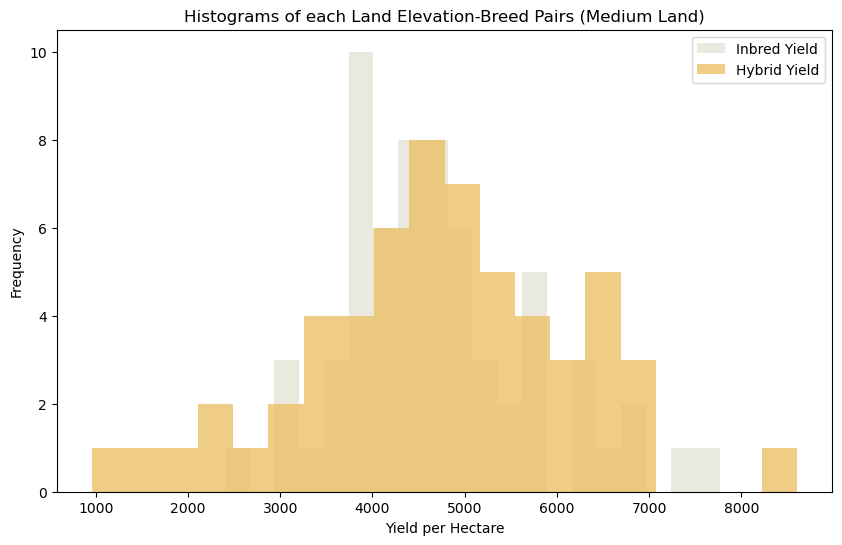

In [235]:
plt.figure(figsize=(10, 6))
plt.hist(data1_mid['KG per ha'], bins=20, alpha=0.75, label='Inbred-Medium land', color='#E4E2D4')
plt.hist(data2_mid['KG per ha'], bins=20, alpha=0.75, label='Hybrid-Medium land', color='#EBBD5D')
plt.title('Histograms of each Land Elevation-Breed Pairs (Medium Land)')
plt.legend(['Inbred Yield', 'Hybrid Yield'])
plt.xlabel('Yield per Hectare')
plt.ylabel('Frequency')
plt.show()

<center><b>Figure 14.</b> Mean Yield per Hectare Per Breed (Medium Land) Histograms</center>

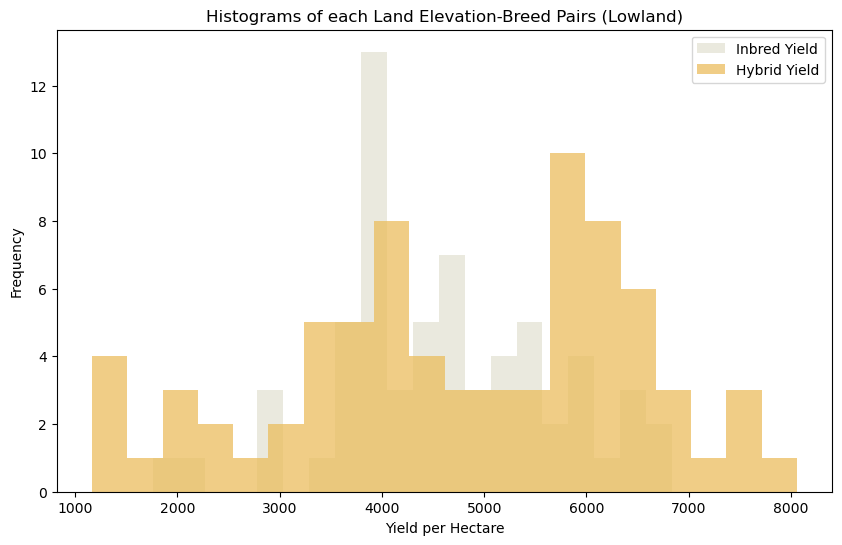

In [236]:
plt.figure(figsize=(10, 6))
plt.hist(data1_low['KG per ha'], bins=20, alpha=0.75, label='Inbred-Lowland', color='#E4E2D4')
plt.hist(data2_low['KG per ha'], bins=20, alpha=0.75, label='Hybrid-Lowland', color='#EBBD5D')
plt.title('Histograms of each Land Elevation-Breed Pairs (Lowland)')
plt.legend(['Inbred Yield', 'Hybrid Yield'])
plt.xlabel('Yield per Hectare')
plt.ylabel('Frequency')
plt.show()

<center><b>Figure 15.</b> Mean Yield per Hectare Per Breed (Lowland) Histograms</center>

It can be seen from this set of figures that while both lowland and medium land pairs nearly approximately follow a normal distribution, the upland pairs except for the hybrid-upland pair show little signs of normality. Although the last one does not show signs of normality, ANOVA is still said to be robust against the violation of its assumption of normality, allowing the use of ANOVA for the given hypothesis. [[6]](#Six)

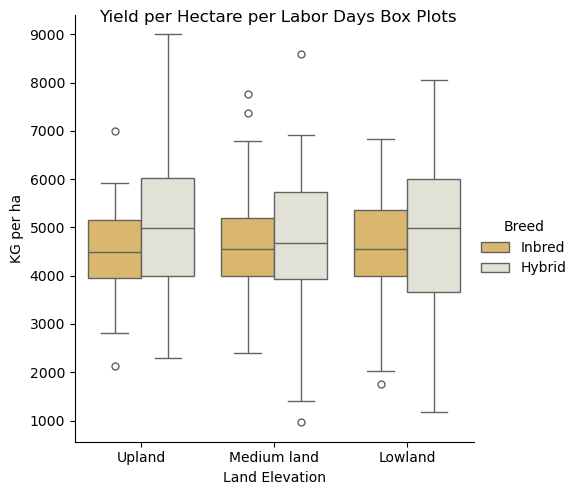

In [242]:
data1 = df_inbred
data2 = df_hybrid
data1['Land Elevation'] = np.where(data1['LANDEL1'] == 1, 'Upland', np.where(data1['LANDEL2'] == 1, 'Medium land',
            np.where(data1['LANDEL3'] == 1, 'Lowland', np.nan)))
data2['Land Elevation'] = np.where(data2['LANDEL1'] == 1, 'Upland', np.where(data2['LANDEL2'] == 1, 'Medium land',
            np.where(data2['LANDEL3'] == 1, 'Lowland', np.nan)))
data1['Breed'] = 'Inbred'
data2['Breed'] = 'Hybrid'
data1_up = data1[data1['Land Elevation'] == 'Upland'][['KG per ha', 'Land Elevation', 'Breed']]
data1_mid = data1[data1['Land Elevation'] == 'Medium land'][['KG per ha', 'Land Elevation', 'Breed']]
data1_low = data1[data1['Land Elevation'] == 'Lowland'][['KG per ha', 'Land Elevation', 'Breed']]
data2_up = data2[data2['Land Elevation'] == 'Upland'][['KG per ha', 'Land Elevation', 'Breed']]
data2_mid = data2[data2['Land Elevation'] == 'Medium land'][['KG per ha', 'Land Elevation', 'Breed']]
data2_low = data2[data2['Land Elevation'] == 'Lowland'][['KG per ha', 'Land Elevation', 'Breed']]
data_overall = pd.concat((data1_up, data1_mid, data1_low, data2_up, data2_mid, data2_low), axis=0)

a = sns.catplot(data = data_overall,
                   x = 'Land Elevation',
                   y = 'KG per ha',
                   hue = 'Breed',
                   kind = 'box',
                   palette = ['#EBBD5D', '#E4E2D4'])
a.fig.suptitle('Yield per Hectare per Labor Days Box Plots')
plt.show()

<center><b>Figure 16.</b> Mean Yield per Hectare Per Breed and Per Land Elevation Boxplots</center>

As shown by the whiskers in the box plots, although medium land and low land have nearly the same variance, the pairs in the upland elevation has a significantly different variance from the others. Hence, while this violates the assumption of ANOVA, given that the samples for each pair would be truncated to 22, the loss in statistical power from unequal variances would be mitigated and lessened as well [[7]](#Seven).

<h4 style='font-family: serif'><i>Mean Yield per Hectare per Labor days of Hybrid Rice vs. Inbred Rice</i></h4>

Given that the groups are not based on other conditions than their breed, there would be no need to check the frequencies of each group, as this has been discussed previously in the first figures.

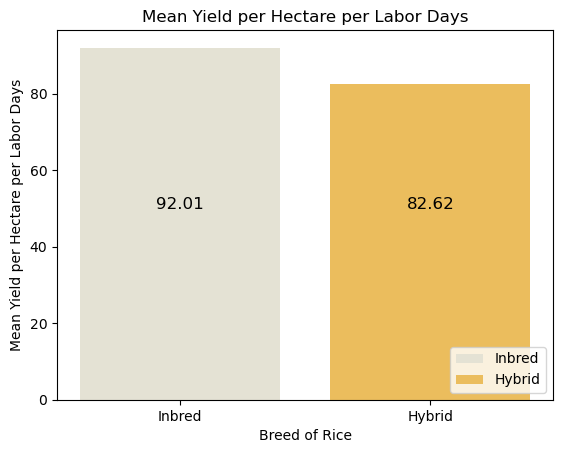

In [90]:
data1 = df_inbred['KG per ha']/df_inbred['Total Labor Days']
data2 = df_hybrid['KG per ha']/df_hybrid['Total Labor Days']
mean1 = np.mean(data1)
mean2 = np.mean(data2)

mean1 = np.mean(data1)
mean2 = np.mean(data2)

plt.bar('Inbred', mean1, color='#E4E2D4')
plt.bar('Hybrid', mean2, color='#EBBD5D')
plt.title('Mean Yield per Hectare per Labor Days')
plt.ylabel('Mean Yield per Hectare per Labor Days')
plt.xlabel('Breed of Rice')
plt.legend(['Inbred', 'Hybrid'], loc='lower right')
plt.text(0, 50, f'{mean1:.2f}', fontsize=12, horizontalalignment='center')
plt.text(1, 50, f'{mean2:.2f}', fontsize=12, horizontalalignment='center')
plt.show()

<center><b>Figure 17.</b> Mean Yield per Hectare per Labor Days of Hybrid vs. Inbred Rice</center>

It can be seen from this figure that if viewed as it is, the mean yield per hectare per labor days (or the amount of yield per hectare for each day spent for labor) is higher for inbred rice as compared to hybrid rice. This necessitates further exploration on whether there is indeed a significant difference for the amount of yield per hectare for each labor day for each breed.

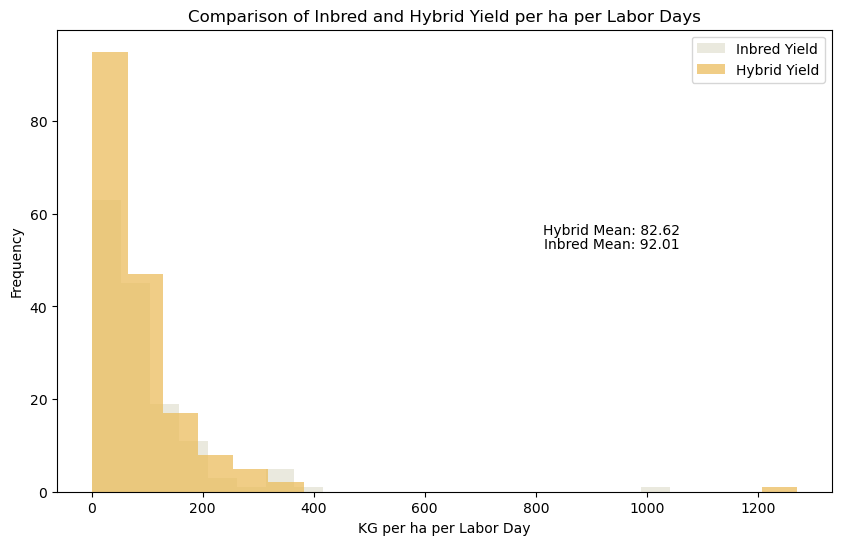

In [93]:
data1 = df_inbred['KG per ha']/df_inbred['Total Labor Days']
data2 = df_hybrid['KG per ha']/df_hybrid['Total Labor Days']
mean1 = np.mean(data1)
mean2 = np.mean(data2)

plt.figure(figsize=(10, 6))
plt.hist(data1, bins=20, alpha=0.75, label='Inbred Yield', color='#E4E2D4')
plt.hist(data2, bins=20, alpha=0.75, label='Hybrid Yield', color='#EBBD5D')
height = 55
plt.text(data1.max()*.9, height, f'Inbred Mean: {mean1:.2f}', color='black', fontsize=10, ha='center', va='top')
plt.text(data1.max()*.9, height, f'Hybrid Mean: {mean2:.2f}', color='black', fontsize=10, ha='center', va='bottom')

plt.title('Comparison of Inbred and Hybrid Yield per ha per Labor Days')
plt.legend(['Inbred Yield', 'Hybrid Yield'])
plt.xlabel('KG per ha per Labor Day')
plt.ylabel('Frequency')
plt.show()

<center><b>Figure 18.</b> Mean Yield per Hectare per Labor Days of Hybrid vs. Inbred Rice Histogram</center>

From this figure, it can be said that the distributions for both groups are skewed to the right, essentially signifying that the kilogram yield per hectare for one labor day spent is on average, around the left, lower side of the histogram (smaller values). Given this similar type of distribution for both groups, Mann-Whitney U test which does not necessitate normality but necessitates similarity in distributions would be most useful in testing the associated hypothesis.

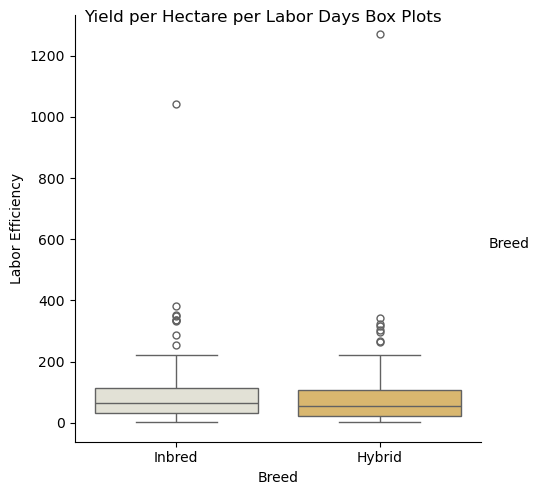

In [100]:
df_data = df_all
df_data['Breed'] = np.where(df_data['Hybrid'] == 1, 'Hybrid', 'Inbred')
df_data['Labor Efficiency'] = df_data['KG per ha'] / df_data['Total Labor Days']
df_data = df_data[['Labor Efficiency', 'Breed']]
a = sns.catplot(data = df_data,
                   x = 'Breed',
                   y = 'Labor Efficiency',
                   hue = 'Breed',
                   kind = 'box',
                   order = ['Inbred', 'Hybrid'],
                   palette = ['#EBBD5D', '#E4E2D4'])
a.fig.suptitle('Yield per Hectare per Labor Days Box Plots')
plt.show()

<center><b>Figure 19.</b> Mean Yield per Hectare per Labor Days of Hybrid vs. Inbred Rice Box Plot</center>

Given that there are two extreme outliers in total for both groups, these would be removed when doing the hypothesis testing, as they would skew the means of both groups. Moreover, it can be seen here that there is indeed a right skew and that there are non-extreme outliers, where the former further supports the use of the Mann-Whitney U test. To show their effects on the mean, a bar plot showing the means of both groups without the outliers would be shown.

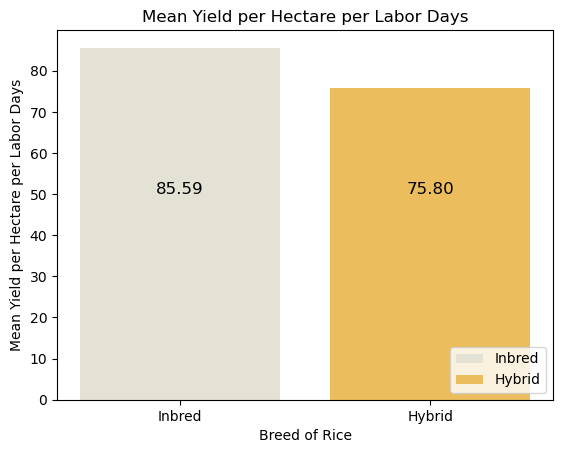

In [141]:
data1 = df_inbred['KG per ha']/df_inbred['Total Labor Days']
data2 = df_hybrid['KG per ha']/df_hybrid['Total Labor Days']
data1.drop(316, inplace=True, axis=0)
data2.drop(152, inplace=True, axis=0)
mean1 = np.mean(data1)
mean2 = np.mean(data2)

mean1 = np.mean(data1)
mean2 = np.mean(data2)

plt.bar('Inbred', mean1, color='#E4E2D4')
plt.bar('Hybrid', mean2, color='#EBBD5D')
plt.title('Mean Yield per Hectare per Labor Days')
plt.ylabel('Mean Yield per Hectare per Labor Days')
plt.xlabel('Breed of Rice')
plt.legend(['Inbred', 'Hybrid'], loc='lower right')
plt.text(0, 50, f'{mean1:.2f}', fontsize=12, horizontalalignment='center')
plt.text(1, 50, f'{mean2:.2f}', fontsize=12, horizontalalignment='center')
plt.show()

Even if the outliers were removed, it can be said that the mean yield per hectare for a one labor day is higher for inbred rice than hybrid rice. This may indicate (not conclusively) a significant difference between their mean yield per hectare per labor days.

<h4 style='font-family: serif'><i>Cost of Hybrid Rice vs. Inbred Rice</i></h4>

Lastly, given that the groups are not based on other conditions than their breed, there would be no need to check the frequencies of each group, as this has been discussed previously in the first figures.

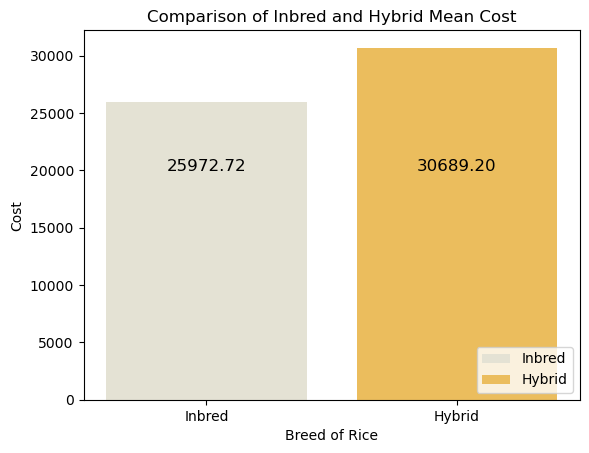

In [161]:
data1 = df_inbred['Total Cost']
data2 = df_hybrid['Total Cost']
mean1 = np.mean(data1)
mean2 = np.mean(data2)

plt.bar('Inbred', mean1, color='#E4E2D4')
plt.bar('Hybrid', mean2, color='#EBBD5D')
plt.title('Comparison of Inbred and Hybrid Mean Cost')
plt.ylabel('Cost')
plt.xlabel('Breed of Rice')
plt.legend(['Inbred', 'Hybrid'], loc='lower right')
plt.text(0, 20000, f'{mean1:.2f}', fontsize=12, horizontalalignment='center')
plt.text(1, 20000, f'{mean2:.2f}', fontsize=12, horizontalalignment='center')
plt.show()

<center><b>Figure 20.</b> Comparison of Inbred and Hybrid Mean Cost</center>

As seen above, the mean total costs for hybrid rice is significantly higher than the mean total costs for inbred rice. This would necessitate testing the hypothesis whether there is indeed a significant difference between the two groups.

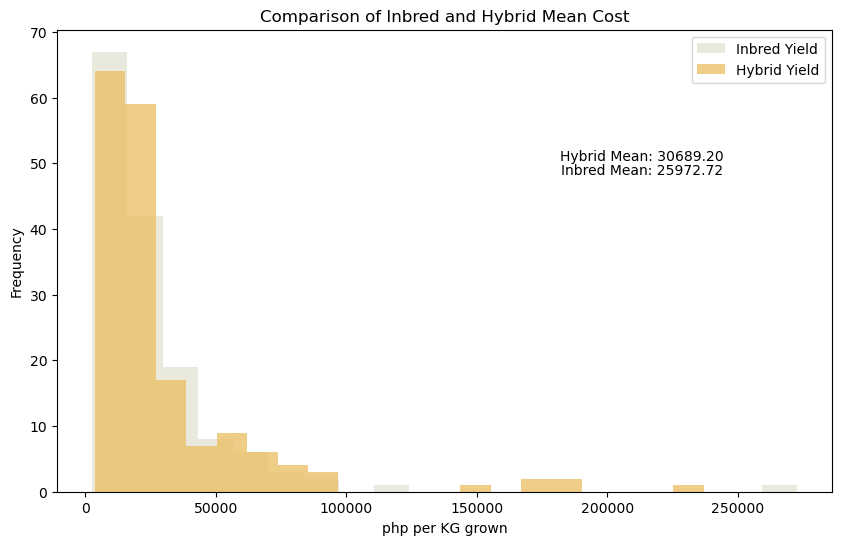

In [166]:
data1 = df_inbred['Total Cost'] 
data2 = df_hybrid['Total Cost']
mean1 = np.mean(data1)
mean2 = np.mean(data2)

plt.figure(figsize=(10, 6))
plt.hist(data1, bins=20, alpha=0.75, label='Inbred Yield', color='#E4E2D4')
plt.hist(data2, bins=20, alpha=0.75, label='Hybrid Yield', color='#EBBD5D')
height = 50
plt.text(data2.max()*.9, height, f'Inbred Mean: {mean1:.2f}', color='black', fontsize=10, ha='center', va='top')
plt.text(data2.max()*.9, height, f'Hybrid Mean: {mean2:.2f}', color='black', fontsize=10, ha='center', va='bottom')

plt.title('Comparison of Inbred and Hybrid Mean Cost')
plt.legend(['Inbred Yield', 'Hybrid Yield'])
plt.xlabel('php per KG grown')
plt.ylabel('Frequency')
# ztest(data1, data2)
# print('Hybrid std',data1.std(), '\nInbred std',data2.std())
plt.show()

<center><b>Figure 21.</b> Comparison of Inbred and Hybrid Mean Cost Histogram</center>

For the given figure, it is shown that the mean total costs have a right-skewed distribution, signifying the need for Mann-Whitney U test in proving the associated hypothesis. Moreover, it can be seen here that there are extreme outliers for both groups, signifying the need for their removal.

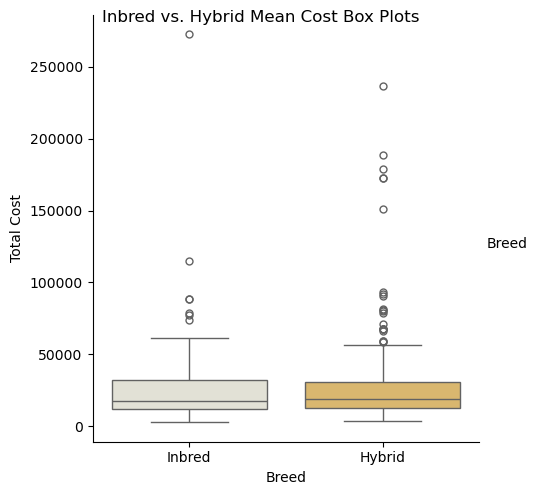

In [167]:
df_data = df_all
df_data['Breed'] = np.where(df_data['Hybrid'] == 1, 'Hybrid', 'Inbred')
df_data = df_data[['Total Cost', 'Breed']]
a = sns.catplot(data = df_data,
                   x = 'Breed',
                   y = 'Total Cost',
                   hue = 'Breed',
                   kind = 'box',
                   order = ['Inbred', 'Hybrid'],
                   palette = ['#EBBD5D', '#E4E2D4'])
a.fig.suptitle('Inbred vs. Hybrid Mean Cost Box Plots')
plt.show()

<center><b>Figure 22.</b> Comparison of Inbred and Hybrid Mean Cost Box Plots</center>

The figure above shows the number of extreme outliers per group, which would be removed during hypothesis testing. Moreover, another bar plot showing the means without the extreme outliers would be displayed and discussed.

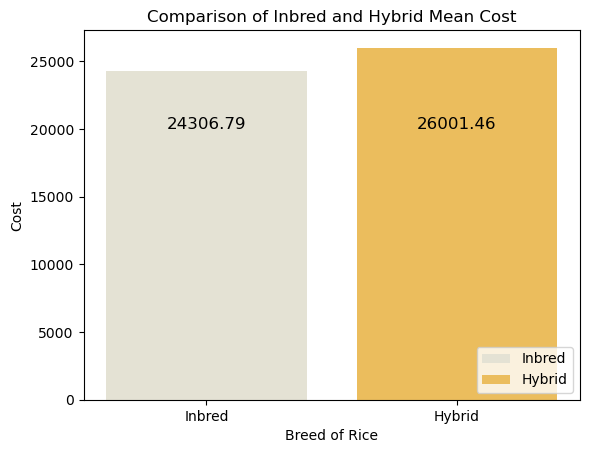

In [189]:
warnings.filterwarnings('ignore')

data1 = df_inbred['Total Cost']
data2 = df_hybrid['Total Cost']
data1.drop(319, inplace=True, axis=0)
lst_idx = list(data2.sort_values(ascending=False).head(5).index)
data2.drop(lst_idx, inplace=True, axis=0)
mean1 = np.mean(data1)
mean2 = np.mean(data2)

plt.bar('Inbred', mean1, color='#E4E2D4')
plt.bar('Hybrid', mean2, color='#EBBD5D')
plt.title('Comparison of Inbred and Hybrid Mean Cost')
plt.ylabel('Cost')
plt.xlabel('Breed of Rice')
plt.legend(['Inbred', 'Hybrid'], loc='lower right')
plt.text(0, 20000, f'{mean1:.2f}', fontsize=12, horizontalalignment='center')
plt.text(1, 20000, f'{mean2:.2f}', fontsize=12, horizontalalignment='center')
plt.show()

<center><b>Figure 23.</b> Comparison of Inbred and Hybrid Mean Cost After Removing The Outliers</center>

The figure above still shows that there may be indeed a significant difference between the groups where mean total cost of hybrid rice still outweighs the mean total cost of inbred rice. This further supports the need for hypothesis testing of the associated hypothesis.

<h4 style='font-family: serif'><i>Gross Profit of Hybrid Rice vs. Inbred Rice</i></h4>

Again, given that the groups are not based on other conditions than their breed, there would be no need to check the frequencies of each group, as this has been discussed previously in the first figures.

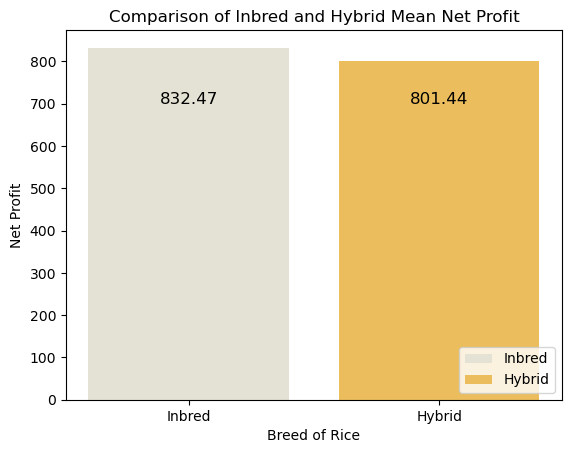

In [151]:
data1 = (df_inbred['KG sold'] * df_inbred['PRIKG']) - ((df_inbred['Total Cost'] / df_inbred['Yield in KG']) * df_inbred['KG sold'])
data2 = df_hybrid['KG sold'] * df_hybrid['PRIKG'] - ((df_hybrid['Total Cost'] / df_hybrid['Yield in KG']) * df_hybrid['KG sold'])
mean1 = np.mean(data1)
mean2 = np.mean(data2)

plt.bar('Inbred', mean1, color='#E4E2D4')
plt.bar('Hybrid', mean2, color='#EBBD5D')
plt.title('Comparison of Inbred and Hybrid Mean Net Profit')
plt.ylabel('Net Profit')
plt.xlabel('Breed of Rice')
plt.legend(['Inbred', 'Hybrid'], loc='lower right')
plt.text(0, 700, f'{mean1:.2f}', fontsize=12, horizontalalignment='center')
plt.text(1, 700, f'{mean2:.2f}', fontsize=12, horizontalalignment='center')
plt.show()

<center><b>Figure 24.</b> Comparison of Inbred and Hybrid Mean Net Profit</center>

As seen here, the net profit which was acquired by multiplying both the kilograms sold and the price per kilogram and subtracting this product by the cost per yield multiplied by the kilogram sold is different for Inbred Rice and Hybrid Rice by a small margin. Still, in order to confirm whether there is a small significance between the two as profitability is one of the key factors to choosing which rice breed to plant, a hypothesis test would be done, and which hypothesis test to use would be explored in the following figures.

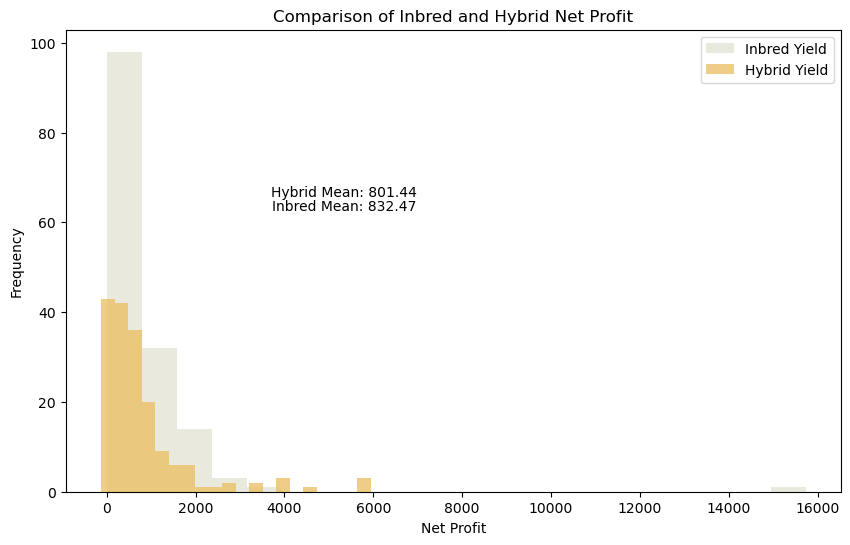

In [114]:
data1 = (df_inbred['KG sold'] * df_inbred['PRIKG']) - ((df_inbred['Total Cost'] / df_inbred['Yield in KG']) * df_inbred['KG sold'])
data2 = df_hybrid['KG sold'] * df_hybrid['PRIKG'] - ((df_hybrid['Total Cost'] / df_hybrid['Yield in KG']) * df_hybrid['KG sold'])
mean1 = np.mean(data1)
mean2 = np.mean(data2)

plt.figure(figsize=(10, 6))
plt.hist(data1, bins=20, alpha=0.75, label='Inbred Yield', color='#E4E2D4')
plt.hist(data2, bins=20, alpha=0.75, label='Hybrid Yield', color='#EBBD5D')
height = 65
plt.text(data2.max()*.9, height, f'Inbred Mean: {mean1:.2f}', color='black', fontsize=10, ha='center', va='top')
plt.text(data2.max()*.9, height, f'Hybrid Mean: {mean2:.2f}', color='black', fontsize=10, ha='center', va='bottom')

plt.title('Comparison of Inbred and Hybrid Net Profit')
plt.legend(['Inbred Yield', 'Hybrid Yield'])
plt.xlabel('Net Profit')
plt.ylabel('Frequency')
plt.show()

<center><b>Figure 25.</b> Comparison of Inbred and Hybrid Net Profit Histogram</center>

As seen in this histogram, the net profit in both groups follows a right-skewed distribution, and so, similar to labor efficiency, the hypothesis test to be used would be Mann-Whitney U test which does not necessitate normality and only necessitates similar shapes for their distributions.

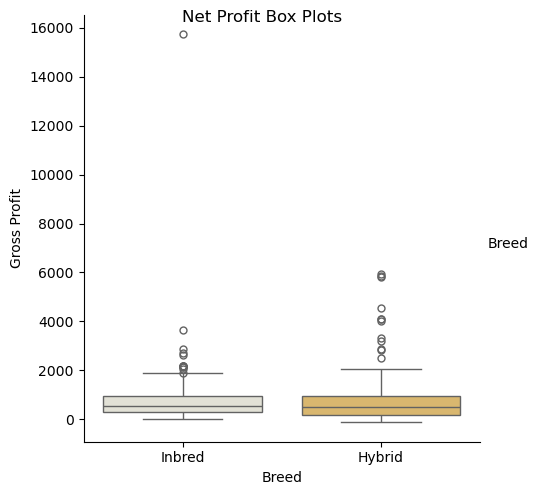

In [117]:
df_data = df_all
df_data['Breed'] = np.where(df_data['Hybrid'] == 1, 'Hybrid', 'Inbred')
df_data['Gross Profit'] = df_data['KG sold'] * df_data['PRIKG'] - ((df_data['Total Cost'] / df_data['Yield in KG']) * df_data['KG sold'])
df_data = df_data[['Gross Profit', 'Breed']]
a = sns.catplot(data = df_data,
                   x = 'Breed',
                   y = 'Gross Profit',
                   hue = 'Breed',
                   kind = 'box',
                   order = ['Inbred', 'Hybrid'],
                   palette = ['#EBBD5D', '#E4E2D4'])
a.fig.suptitle('Net Profit Box Plots')
plt.show()

<center><b>Figure 26.</b> Comparison of Inbred and Hybrid Net Profit Box Plots/center>

Again, for the net profit, there is an extreme outlier for the inbred rice. Similarly, this outlier would be removed during hypothesis testing, and as seen in the box plot's whiskers, it signifies a right skewed distribution for both. Hence, this further supports using Mann-Whitney U test for this associated hypothesis. In order to see further its effect on the net profit for inbred rice, a bar plot showing the means of both groups, with the outlier removed would be shown.

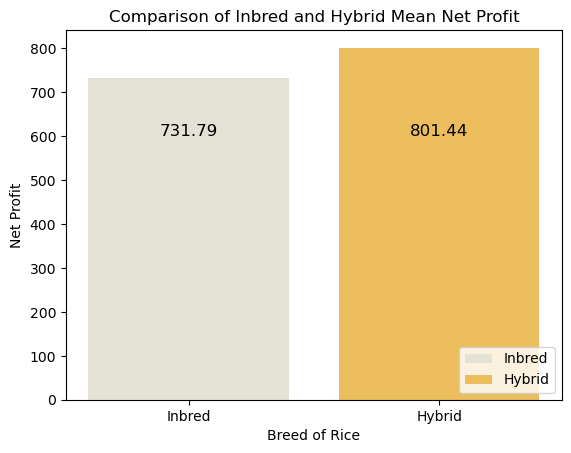

In [150]:
data1 = (df_inbred['KG sold'] * df_inbred['PRIKG']) - ((df_inbred['Total Cost'] / df_inbred['Yield in KG']) * df_inbred['KG sold'])
data2 = df_hybrid['KG sold'] * df_hybrid['PRIKG'] - ((df_hybrid['Total Cost'] / df_hybrid['Yield in KG']) * df_hybrid['KG sold'])
data1.drop(319, inplace=True, axis=0)
mean1 = np.mean(data1)
mean2 = np.mean(data2)

plt.bar('Inbred', mean1, color='#E4E2D4')
plt.bar('Hybrid', mean2, color='#EBBD5D')
plt.title('Comparison of Inbred and Hybrid Mean Net Profit')
plt.ylabel('Net Profit')
plt.xlabel('Breed of Rice')
plt.legend(['Inbred', 'Hybrid'], loc='lower right')
plt.text(0, 600, f'{mean1:.2f}', fontsize=12, horizontalalignment='center')
plt.text(1, 600, f'{mean2:.2f}', fontsize=12, horizontalalignment='center')
plt.show()

<center><b>Figure 27.</b> Comparison of Inbred and Hybrid Mean Net Profit After Removing The Outliers/center>

As seen here in the figure above, removing the outlier caused the means to differ significantly which means that one of the inbred rice farmers may be perfoming extremely well, which is not representative of most farmers and whose net profit may skew the mean of the inbred rice. Hence, it is best to remove the outlier when doing the hypothesis testing for these groups.

<h3 style='font-family: serif'><b><i>Hypothesis Testing</i></b></h3>

<h4 style='font-family: serif'><i>Hypotheses Overview and Discussion</i></h4>

The following are the hypotheses to be tested:
<p><b>Table 4.</b></p>
<p><i>Hypotheses and Hypothesis Test</i></p>

<table>
    <tr style="color:#ffffff; background-color:#EBBD5D;">
        <th style="text-align: left">Research Question No</th>
        <th style="text-align: left" width=25%>Null Hypothesis ($H_{0}$)</th>
        <th style="text-align: left" width=25%>Alternative Hypothesis ($H_{a}$)</th>
        <th style="text-align: left">Hypothesis Test</th>
        <th style="text-align: left">Brief Explanation</th>
    </tr>
    <tr>
        <th style="text-align: left">1</th>
        <td style="text-align: left" width=25%>$\mu_{1} = \mu_{2}$</td>
        <td style="text-align: left;"width=25%>$\mu_{1} > \mu_{2}$</td>
        <td style="text-align: left">Z-test</td>
        <td style="text-align: left">$\mu_{1}$ is the mean yield per hectare of the hybrid variety while $\mu_{2}$ is the mean yield per hectare of the inbred variety.</td>
    </tr>
    <tr>
        <th style="text-align: left">2</th>
        <td style="text-align: left" width=25%>$\mu_{1} = \mu_{2}$</td>
        <td style="text-align: left;"width=25%>$\mu_{1} > \mu_{2}$</td>
        <td style="text-align: left">Z-test</td>
        <td style="text-align: left">$\mu_{1}$ is the mean yield per hectare of the hybrid variety while $\mu_{2}$ is the mean yield per hectare of the inbred variety, given a gravity irrigation system.</td>
    </tr>
    <tr>
        <th style="text-align: left">3</th>
        <td style="text-align: left" width=25%>$\mu_{1} = \mu_{2} = \mu_{3} = \mu_{4} = \mu_{5} = \mu_{6}$</td>
        <td style="text-align: left;"width=25%>At least one pair of means are significantly different from each other</td>
        <td style="text-align: left">One-way ANOVA</td>
        <td style="text-align: left">where $\mu{n}$ is the mean yield per hectare for each breed-land elevation pair.</td>
    </tr>
    <tr>
        <th style="text-align: left">4</th>
        <td style="text-align: left" width=25%>$\mu_{1} = \mu_{2}$</td>
        <td style="text-align: left;"width=25%>$\mu_{1} \neq \mu_{2}$</td>
        <td style="text-align: left">Mann-Whitney U Test</td>
        <td style="text-align: left">where $\mu_{1}$ is the mean yield per hectare per labor day of the hybrid variety while $\mu_{2}$ is the mean yield per hectare per labor day of the inbred variety.</td>
    </tr>
    <tr>
        <th style="text-align: left">5.1</th>
        <td style="text-align: left" width=25%>$\mu_{1} = \mu_{2}$</td>
        <td style="text-align: left;"width=25%>$\mu_{1} > \mu_{2}$</td>
        <td style="text-align: left">Mann-Whitney U Test</td>
        <td style="text-align: left">where $\mu_{1}$ is the mean total cost incurred from the hybrid variety while $\mu_{2}$ is the mean total cost incurred from the inbred variety.</td>
    </tr>
    <tr>
        <th style="text-align: left">5.2</th>
        <td style="text-align: left" width=25%>$\mu_{1} = \mu_{2}$</td>
        <td style="text-align: left;"width=25%>$\mu_{1} \neq \mu_{2}$</td>
        <td style="text-align: left">Mann-Whitney U Test</td>
        <td style="text-align: left">where $\mu_{1}$ is the mean net profit derived from the hybrid variety while $\mu_{2}$ is the net profit derived from the inbred variety.</td>
    </tr>
</table>

The following are the hypotheses for each research question:

<b>Research Question 1</b><br>
<b>Null Hypothesis</b>: The mean yield per hectare for hybrid rice and inbred rice is equal.<br>
<b>Alternative Hypothesis</b>: The mean yield per hectare for hybrid rice and inbred rice is not equal, where the mean yield per hectare for hybrid rice is greater.<br>
<b>Rationale for Alternative Hypothesis</b>: According to Biswas, et.al. [[9]](#Nine), the yield potential for hybrid rice is significantly greater, and so this may be used as the rationale for setting the alternative hypothesis as hybrid rice yield per hectare as being greater in the alternative hypothesis.<br>

<b>Research Question 2</b><br>
<b>Null Hypothesis</b>: Given similar gravity irrigation system, the mean yield per hectare for hybrid rice and inbred rice is equal.<br>
<b>Alternative Hypothesis</b>: Given similar gravity irrigation system, the mean yield per hectare for hybrid rice and inbred rice is not equal, where the mean yield per hectare for hybrid rice is greater.<br>
<b>Rationale for Alternative Hypothesis</b>: This is in line with the previous rationale where it was posited that hybrid rice has greater yield potential in general. Through this alternative hypothesis, it may be known whether this is true for a condition, that is, gravity irrigation system. [[9]](#Nine)<br>

<b>Research Question 3</b><br>
<b>Null Hypothesis</b>: Given different land elevations and rice breed pairs, the mean yield per hectare for hybrid rice and inbred rice is equal. <br>
<b>Alternative Hypothesis</b>: There is at least one pair of breed-land elevation combination that has a significant difference of yield per hectare compared to the other combinations of breed-land elevation.<br>
<b>Rationale for Alternative Hypothesis</b>: This is in line again with the previous rationale where it was posited that hybrid rice has greater yield potential in general. Through this alternative hypothesis, it may be known whether this is true for different conditions, that are, different land elevations. [[9]](#Nine)<br>

<b>Research Question 4</b><br>
<b>Null Hypothesis</b>: The mean yield per hectare per labor day for hybrid rice and inbred rice is equal.<br>
<b>Alternative Hypothesis</b>: The mean yield per hectare per labor day for hybrid rice and inbred rice is not equal.<br>
<b>Rationale for Alternative Hypothesis</b>: Given that there were no found studies positing the yield potential in terms of labor day, for this alternative hypothesis, it would be set as a two-tailed test, given the lack of assumptions.<br>

<b>Research Question 5</b><br>
<b>Null Hypothesis</b>: The mean cost per yield for hybrid rice and inbred rice is equal.<br>
<b>Alternative Hypothesis</b>: The mean cost per yield for hybrid rice and inbred rice is not equal, where the mean total cost incurred from the hybrid variety is greater.<br>
<b>Rationale for Alternative Hypothesis</b>: According to Madeja, Nasibog, and Roxas [[11]](#Eleven), the farmers who ventured into hybrid rice varieties incurred the highest production costs. Thus, given this assumption, the alternative test would be hybrid rice having a greater mean total cost.<br>

<b>Null Hypothesis</b>: The mean net profit per hectare of hybrid rice and inbred rice is equal.<br>
<b>Alternative Hypothesis</b>: The mean net profit per hectare of hybrid rice and inbred rice is not equal.<br>
<b>Rationale for Alternative Hypothesis</b>: According to Chenggapa, Gowda, and Janaiah, [[12]](#Twelve), in China, it was found that there is greater profitability in hybrid rice over inbred rice given a yield advantage of 15-20% and given the conditions in the study. Although the conditions may differ for the dataset used, given that it was found that hybrid rice is profitable in their study, the assumption can be used to support the alternative hypothesis where it is hypothesized that hybrid rice has a greater mean profit than inbred rice.<br>

<h4 style='font-family: serif'><i>Hypothesis Tests Overview and Discussion</i></h4>

<b>Z-TEST</b>

In this report, we utilized the Z-test to compare the means of two independent groups—Hybrid and Inbred rice varieties—to assess whether the differences in their respective yields, costs, and other metrics were statistically significant. The Z-test is a statistical method that determines if there is a significant difference between sample means against a null hypothesis, which typically states that there is no difference. [[13]](#Thirteen)

How the Z-test works is by calculating the Z-statistic, a value that indicates the number of standard deviations a data point is from the mean. If the Z-statistic falls within the range of the standard normal distribution (typically between -1.96 and +1.96 for a 95% confidence interval), the null hypothesis cannot be rejected, suggesting no significant difference between the groups. If the Z-statistic falls outside this range, the null hypothesis is rejected, indicating a statistically significant difference. [[14]](#Fourteen)

The application of the Z-test in this context is supported by the assumption that the data samples are large enough for the Central Limit Theorem to apply, which assume that the sampling distribution of the sample mean approaches a normal distribution as the sample size grows, regardless of the population's distribution.

In the study, the Z-test is used to construct confidence intervals for the mean values of different variables, such as yield per hectare and gross earnings. These intervals provide a range within which the true mean of the population is expected to lie with a certain degree of confidence (95% in this case). By comparing these intervals between Hybrid and Inbred rice varieties, we can infer whether the observed differences in sample means likely reflect true differences in the population or are due to random variation.

<b>ONE-WAY ANOVA</b>

Analysis of Variance (ANOVA) was applied to evaluate the effect of land elevation on rice yield. ANOVA is a statistical method used to compare the means of three or more independent groups to see if at least one group mean is significantly different. [[16]](#Sixteen) This is particularly important for agricultural studies where factors such as land elevation can have a profound impact on crop yields.

When the ANOVA results indicate significant differences, it suggests that elevation may play a crucial role in the productivity of rice varieties. However, ANOVA does not tell us which specific groups differ from each other.


<b>MANN-WHITNEY U TEST</b>

Aside from the Z-test, we also needed to use the Mann Whitney U test for determining the differences in two samples since some of the data was not normally distributed. 

The Mann-Whitney U test is a non-parametric test that compares two independent samples to determine if they come from the same distribution. It is especially useful when the sample sizes are small or the data do not follow a normal distribution. [[16]](#Sixteen)

The Mann-Whitney U test operates by ranking all data points from both groups together, regardless of which group they belong to, and then analyzing the sum of these ranks. If the ranks are significantly different between the two groups, the test indicates that the samples are likely drawn from different populations.

In [ ]:
# Yield per hectare
data1 = df_hybrid['KG per ha']
data2 = df_inbred['KG per ha']


z_test_stat1, p_val1 = ztest(data1, data2, value=0, alternative='larger')

In [ ]:
# Yield per hectare for gravity irrigation

data1 = df_all[(df_all['IRRIG 1']==1)&(df_all['Hybrid']==1)]['KG per ha']
data2 = df_all[(df_all['IRRIG 1']==1)&(df_all['Inbred']==1)]['KG per ha']

z_test_stat2, p_val2 = ztest(data1, data2, value=0, alternative='larger')

In [ ]:
# One-way ANOVA Test for Land Elevation-Breed Pairs

data1 = df_inbred
data2 = df_hybrid
data1_up = data1[data1['Land Elevation'] == 'Upland']['KG per ha'][:22]
data1_mid = data1[data1['Land Elevation'] == 'Medium land']['KG per ha'][:22]
data1_low = data1[data1['Land Elevation'] == 'Lowland']['KG per ha'][:22]
data2_up = data2[data2['Land Elevation'] == 'Upland']['KG per ha'][:22]
data2_mid = data2[data2['Land Elevation'] == 'Medium land']['KG per ha'][:22]
data2_low = data2[data2['Land Elevation'] == 'Lowland']['KG per ha'][:22]

f_test_stat3, p_val3 = f_oneway(data1_up, data1_mid, data1_low, data2_up, data2_mid, data2_low)

In [ ]:
# Mann-Whitney U Test (Yield per ha per labor day)

data1 = df_hybrid['KG per ha']/df_hybrid['Total Labor Days']
data2 = df_inbred['KG per ha']/df_inbred['Total Labor Days']
data1.drop(152, inplace=True, axis=0)
data2.drop(316, inplace=True, axis=0)


m_test_stat4, p_val4 = mannwhitneyu(data1, data2, alternative='two-sided')

In [ ]:
# Mann-Whitney U Test (Total Cost)

warnings.filterwarnings('ignore')

data1 = df_hybrid['Total Cost']
data2 = df_inbred['Total Cost']
lst_idx = list(data1.sort_values(ascending=False).head(5).index)
data1.drop(lst_idx, inplace=True, axis=0)
data2.drop(319, inplace=True, axis=0)

m_test_stat5, p_val5 = mannwhitneyu(data1, data2, alternative='greater')

In [ ]:
# Mann-Whitney U Test (Net Profit)

data1 = df_hybrid['KG sold'] * df_hybrid['PRIKG'] - ((df_hybrid['Total Cost'] / df_hybrid['Yield in KG']) * df_hybrid['KG sold'])
data2 = (df_inbred['KG sold'] * df_inbred['PRIKG']) - ((df_inbred['Total Cost'] / df_inbred['Yield in KG']) * df_inbred['KG sold'])
data2.drop(319, inplace=True, axis=0)

m_test_stat6, p_val6 = mannwhitneyu(data1, data2, alternative='two-sided')

<h1 style="color: #E4E2D4; padding: 10px 10px 10px 10px; background-image:url(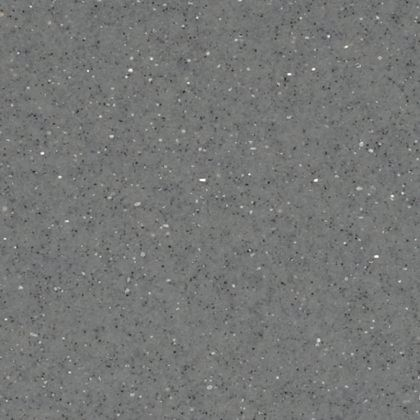)">Results and Discussion</h1>

<h4 style='font-family: serif'><i>Results</i></h4>

<p><b>Table 5.</b></p>
<p><i>Results of the Hypothesis Testing</i></p>

In [289]:
TestedParameter = ['Inbred and Hybrid Yield (KG/ha)',
                   'Inbred and Hybrid Yield (KG/ha) (Gravity Irrigation',
                    'Inbred and Hybrid Yield (KG/ha) (per Land Elevation)',
                    'Yield per ha per Labor (KG/ha/labor)',
                    'Total costs (php)',
                    'Net Profit (php)']
Test = ['Z-test', 'Z-test', 'One-way ANOVA', 'Mann-Whitney U Test',
        'Mann-Whitney U Test', 'Mann-Whitney U Test']
Result = ['Fail to reject', 'Fail to reject', 'Fail to reject', 'Fail to reject',
          'Fail to reject', 'Fail to reject']
p_value = [p_val1, p_val2, p_val3, p_val4, p_val5, p_val6]
test_stat_name = ['Z-statistic', 'Z-statistic','F-statistic', 'Mann-Whitney U Statistic',
                  'Mann-Whitney U Statistic', 'Mann-Whitney U Statistic']
test_statistic = [z_test_stat1, z_test_stat2, f_test_stat3, m_test_stat4, m_test_stat5, m_test_stat6]
df_results = pd.DataFrame({'Parameters':TestedParameter, 'Hypothesis Test (0.05 level of significance)':Test, 
                           'Test Stastistic': test_stat_name, 'Test Statistic Value': test_statistic,
                           'p-value': p_value, 'Decision':Result})
pretty_print(df_results)

,Parameters,Hypothesis Test (0.05 level of significance),Test Stastistic,Test Statistic Value,p-value,Decision
0,Inbred and Hybrid Yield (KG/ha),Z-test,Z-statistic,1.235843,0.108259,Fail to reject
1,Inbred and Hybrid Yield (KG/ha) (Gravity Irrigation,Z-test,Z-statistic,1.222644,0.110732,Fail to reject
2,Inbred and Hybrid Yield (KG/ha) (per Land Elevation),One-way ANOVA,F-statistic,1.032704,0.401377,Fail to reject
3,Yield per ha per Labor (KG/ha/labor),Mann-Whitney U Test,Mann-Whitney U Statistic,11779.000000,0.187831,Fail to reject
4,Total costs (php),Mann-Whitney U Test,Mann-Whitney U Statistic,13190.000000,0.228054,Fail to reject
5,Net Profit (php),Mann-Whitney U Test,Mann-Whitney U Statistic,12033.000000,0.272897,Fail to reject


<b>YIELD PER HA</b>

Given the significance level of 0.05, the resulting p-value of 0.1082 suggests that we do not have sufficient evidence to reject the null hypothesis. Therefore, we fail to reject the null hypothesis, indicating that, at the 0.05 significance level, there is no significant difference in the mean yield per hectare for hybrid rice and inbred rice. This implies that the amount of rice produce harvested from one hectare of land is statistically considered to be equal, regardless of the breed of rice planted.


<b>GRAVITY IRRIGATION</b>

Given the significance level of 0.05, the resulting p-value of 0.1107 suggests that we do not have sufficient evidence to reject the null hypothesis. Therefore, we fail to reject the null hypothesis, indicating that, at the 0.05 significance level, given similar gravity irrigation system, there is no significant difference in the mean yield per hectare for hybrid rice and inbred rice. This implies that the amount of rice produce harvested from one hectare of land is statistically considered to be equal, regardless of the breed of rice planted, and regardless of irrigation type.


<b>LAND ELEVATION</b>

Given the significance level of 0.05, the resulting p-value of 0.4013 suggests that we do not have sufficient evidence to reject the null hypothesis. Therefore, we fail to reject the null hypothesis, indicating that, at the 0.05 significance level, there is no significant difference in the mean yield per hectare for hybrid rice and inbred rice across different breed-land elevation pairs. This implies that the amount of rice produce harvested from one hectare of land, is statistically considered to be equal, regardless of the breed of rice planted or land elevation type.


<b>LABOR</b>

Given the significance level of 0.05, the resulting p-value of 0.1878 suggests that we do not have sufficient evidence to reject the null hypothesis. Therefore, we fail to reject the null hypothesis, indicating that, at the 0.05 significance level, there is no significant difference in the mean yield per hectare per labor days for hybrid rice and inbred rice. This implies that the labor productivity of planting either hybrid or inbred rice is the same.

<b>COST & PROFIT</b>

Given the significance level of 0.05, the resulting p-value of 0.2280 suggests that we do not have sufficient evidence to reject the null hypothesis. Therefore, we fail to reject the null hypothesis, indicating that, at the 0.05 significance level, there is no significant difference in the mean cost total cost for hybrid rice and inbred rice. This implies that the total cost for either breed is the same.

Given the significance level of 0.05, the resulting p-value of 0.2728 suggests that we do not have sufficient evidence to reject the null hypothesis. Therefore, we fail to reject the null hypothesis, indicating that, at the 0.05 significance level, there is no significant difference in the mean net profit for hybrid rice and inbred rice. This implies that the profitability of either breed is the same.


<h4 style='font-family: serif'><i>Discussion</i></h4>

The study reveals that while hybrid rice typically yields higher per hectare and may offer greater potential gross earnings, these advantages are not statistically significant in key aspects such as cost-effectiveness and labor efficiency when compared to inbred rice. This finding is crucial as it challenges the prevailing assumption of hybrid rice invariably leading to superior agronomic and economic outcomes.

Although from the Exploratory Data Analysis, hybrid rice shows a tendency for higher yields, this is accompanied by notable increases in both yield and cost variability. This suggests that the higher yields from hybrid rice come with greater risk, rendering it a less predictable choice for farmers. In contrast, inbred rice demonstrates more consistent labor efficiency and cost-effectiveness per kilogram as per its variance, highlighting its potential as a stable and reliable option for farmers, especially those with limited resources and risk management capabilities.

Contrasting the study with existing literature, such as Chengappa, Gowda, & Janaiah [[12]](#Twelve), which reported a clear yield advantage for hybrid rice, our findings suggest that the benefits of hybrid rice might be context-dependent. This is supported by research by Chen, Mishra, Sha, & Yan [[15]](#Fifteen), which found no yield superiority of hybrid rice over high-yielding inbred rice under specific conditions like higher planting density and reduced nitrogen application.

The greater variability associated with hybrid rice contradicts the expected consistent yield advantage often associated with hybrid varieties. In comparison, inbred rice's more consistent labor efficiency and cost-effectiveness align with findings pointing to high production costs involved in hybrid rice cultivation.

Interestingly, our study also indicates no significant difference in net profits between hybrid and inbred Rice, suggesting comparable profitability. This consistency in profitability underscores the need for a balanced approach to rice cultivation that weighs the benefits of higher yields against the risks and labor requirements.

<h1 style="color: #E4E2D4; padding: 10px 10px 10px 10px; background-image:url(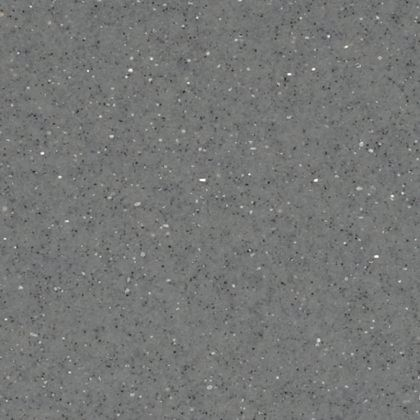)">Conclusion</h1>

In the study, we set out to find if there are significant differences in the productivity and profitability of planting either hybrid or inbred type of rice. With all hypothesis tests resulting to not significant, this suggests that the productivity and profitability of either type of rice is the same. Regardless of land elevation, irrigation type, or labor, the yield of both types is the same. And costs and net profits of either types is also the same.

In the current body of knowledge, hybrid rice is being put forward as the option for farmers which produces the most yields as compared to inbred rice [[8]](#Eight) [[9]](#Nine). As the tests have shown, at least within the population of this dataset, which is for Isabela and Bukidnon farmers, this has proven to not be the case. According to the Rice Knowledge Bank [[10]](#Ten), hybrid rice should produce more yields and are more resistant to diseases and insects. Though they may indeed increase yields, it is not a significant difference to what farmers are used to, which are the inbred type of rice.

Hence, the findings posit that projects involving cultivating hybrid or inbred rice should be decided and strategized well, catering to individual circumstances instead of a one-size-fits-all approach. In line with this, policymakers and agricultural advisors should provide context-specific support to farmers which include risk management training, market trend insights, and crop selection advice, empowering them to make informed decisions which are line with their contexts and goals.

<h1 style="color: #E4E2D4; padding: 10px 10px 10px 10px; background-image:url(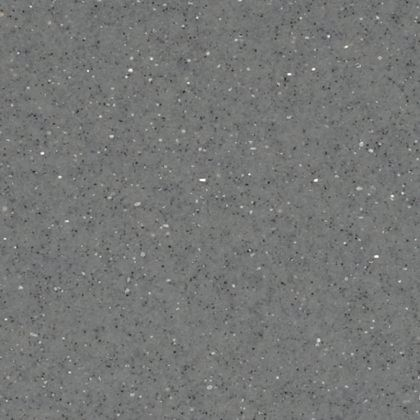)">Recommendations</h1>

In farming, the geography and specific location are significant factors that affect the production and yield for farmers. Data on rice production within different locations aside from the dataset is good to compare to see whether that has an effect on the profitability and productivity of different rice breeds. Furthermore, the conditions and assets of farmers are valuable factors to take into consideration on the yield as well. Irrigation, fertiliser, and specific cultivation methods are all features that can be specifically studied with larger data sets to better understand their impact to yield. Ultimately, the most important output in a study regarding rice production is to be able to create a guide for farmers on when it is ideal to cultivate a certain breed.

<h1 style="color: #E4E2D4; padding: 10px 10px 10px 10px; background-image:url(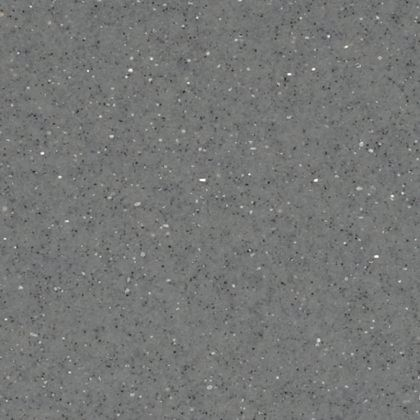)">References</h1>

<a id='One'></a>[1] Cabrera, Ellanie. Socio-Economic Evaluation of Hybrid Rice Cultivation in the Philippines, Harvard Dataverse, V3 (2014). Retreived from https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi%3A10.7910%2FDVN%2F26246&fbclid=IwAR2y-A50Xg_zmCMFiDFaSXxUWtn5SxepsIkzSIZHhkZYYpRWvk5DkUiEp1c https://doi.org/10.7910/DVN/26246

<a id='Two'></a>[2] Department of Science and Technology, The Philippine Council for Agriculture, Aquatic, and Natural Resources Research and Development. Rice, Industry Strategic Science and Technology Program (nd). Retrieved from https://ispweb.pcaarrd.dost.gov.ph/isp-commodities/rice/#:~:text=The%20Philippines%20alone%20recorded%204.81,agricultural%20item%20of%20the%20country

<a id='Three'></a>[3] Department of Agriculture: Philippine Rice Research Institute. Palay Production (nd). Retrieved from https://www.philrice.gov.ph/ricelytics/productions

<a id='Four'></a>[4] Department of Agriculture. Department of Agriculture 2022 Annual Report (2023). Retrived from https://www.da.gov.ph/media-resources/da-annual-reports/

<a id='Five'></a> [5] Minitab. (n.d.). Data Considerations for One-Way ANOVA. Retrieved from https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/anova/how-to/one-way-anova/before-you-start/data-considerations/#:~:text=The%20actual%20sample%20size%20that,should%20be%20at%20least%2020.

<a id='Six'></a> [6] 10.2.1 - ANOVA Assumptions | STAT 500. (n.d.). PennState: Statistics Online Courses. https://online.stat.psu.edu/stat500/lesson/10/10.2/10.2.1

<a id='Seven'></a> [7] Zach. (2019). How to Check ANOVA Assumptions. Statology. Retrieved from https://www.statology.org/anova-assumptions/ 

<a id='Eight'></a> [8] Chengappa, P.G., Gowda, M.V.S., & Janaiah A(1994). Profitability of Hybrid Rice Cultivation: Evidence from Karnataka. Economic and Political Weekly. Retrieved from: https://www.jstor.org/stable/4413711

<a id='Nine'></a> [9] Biswas J.K.,  Iftekharuddaula, K.M., Haque, M.M., Hasanuzzaman, M., & Pramanik, H.R.  (2015). Comparative Performance of Hybrid and Elite Inbred Rice Varieties with respect to Their Source-Sink Relationship. The Scientific World Journal, 2015. https://doi.org/10.1155/2015/326802

<a id='Ten'></a> [10] Rice Knowledge Bank. (n.d.). Hybrid Rice. Retrieved from http://www.knowledgebank.irri.org/training/fact-sheets/crop-establishment/item/hybrid-rice-fact-sheet#:~:text=Increased%20yields%2C,resistance%20to%20diseases%20and%20insects.

<a id='Eleven'></a> [11] Madeja, G.C., Nasibog, L.D.,  & Roxas, C.A. (2015). Comparing the Profitability of Hybrid, Inbred, and Organic Rice Production. Semantic Scholar. Retrieved from https://www.semanticscholar.org/paper/Comparing-the-Profitability-of-Hybrid%2C-Inbred%2C-and-Nasibog-Roxas/

<a id='Twelve'></a> [12] Chengappa, P.G., Gowda, M.V.S., & Janaiah A(1994). Profitability of Hybrid Rice Cultivation: Evidence from Karnataka. Economic and Political Weekly. Retrieved from: https://www.jstor.org/stable/4413711

<a id='Thirteen'></a> [13] Chen, J. (2023, August 20). Z-Test Definition: Its Uses in Statistics Simply Explained With Example. Retrieved from https://www.investopedia.com/terms/z/z-test.asp#toc-what-is-a-z-test

<a id='Fourteen'></a> [14] Howell, E. (2023, February 02). Z-Test for Statistical Hypothesis Testing Explained. Retrieved from https://builtin.com/data-science/z-test-statistics

<a id='Fifteen'></a> [15] Chen, F., Mishra, A., Sha, W., & Yan, Zedong. (2022). An economic assessment of adoption of hybrid rice: Micro-level evidence from southern China. Frontiers in Sustainable Food Systems. https://doi.org/10.3389/fsufs.2022.1066657

<a id='Sixteen'></a> [16] Kenton, W. (2023, June 12). Analysis of Variance (ANOVA) Explanation, Formula, and Applications. Retrieved from https://www.investopedia.com/terms/a/anova.asp